In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


##Automatic Ticket Assignment
One of the key activities of any IT function is to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact.

In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources.

Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

Business Domain Value:
In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings.

Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure.

L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service.

Objective:
Build Multi-Class classifier that can classify the tickets by analysing text.
Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

Milestones
Milestone 1: Pre-Processing, Data Visualisation and EDA

Exploring the given Data files
Understanding the structure of data
Missing points in data
Finding inconsistencies in the data
Visualizing different patterns
Visualizing different text features
Dealing with missing values
Text preprocessing
Creating word vocabulary from the corpus of report text data
Creating tokens as required
Milestone 2: Model Building

Building a model architecture which can classify.
Trying different model architectures by researching state of the art for similar tasks.
Train the model
To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.
Milestone 3: Test the Model, Fine-tuning and Repeat

Test the model and report as per evaluation metrics
Try different models
Try different evaluation metrics
Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them
Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.

# Load data and Pre-processing

In [ ]:
#Set your project path & file name 
# project_path = '/content/drive/My Drive/ML_Project/Capstone/'
project_path = '/content/drive/MyDrive/Capstone Project/'
file_name ='input_data.xlsx'

import pandas as pd 
import numpy as np 
import re 
import sys
itTicketDF=pd.read_excel(project_path+file_name)
itTicketDF.head()



Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

In [ ]:
# Check the tail of the dataset
itTicketDF.tail()

Description Assignment group
8495  \r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...           GRP_29
8496                           telephony_software issue            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...            GRP_0
8498  i am unable to access the machine utilities to...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...           GRP_49

In [ ]:
callers = itTicketDF['Caller'].unique() 
callers.shape
itTicketDF.drop(["Caller",'Short description'],axis=1,inplace= True)
itTicketDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8499 non-null   object
 1   Assignment group  8500 non-null   object
dtypes: object(2)
memory usage: 132.9+ KB


##Comments
To take a closer look at the data, pandas library provides “.head()” function which returns first five observations and “.tail()” function which returns last five observations of the data set.

The dataset is divided into two parts, namely, feature matrix and the response vector.

Feature matrix contains all the vectors(rows) of dataset in which each vector consists of the value of dependent features. In above dataset, features are Short description, Description and Caller.
Response vector contains the value of class variable(prediction or output) for each row of feature matrix. In above dataset, the class variable name is Assignment group.

In [ ]:
# Get the shape and size of the dataset
print('No of rows:\033[1m', itTicketDF.shape[0], '\033[0m')
print('No of cols:\033[1m', itTicketDF.shape[1], '\033[0m')

No of rows: 8500 
No of cols: 2 


In [ ]:
targetClassCnt=itTicketDF['Assignment group'].value_counts()
targetClassCnt.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: Assignment group, dtype: float64

In [ ]:
# Check the Short description of tickets having Description as only 'the'
itTicketDF[itTicketDF.Description == 'the'].head()

Description Assignment group
1049         the           GRP_17
1054         the           GRP_17
1144         the           GRP_17
1184         the           GRP_17
1292         the           GRP_17

In [ ]:
# Find out the null value counts in each column
itTicketDF.isnull().sum()

Description         1
Assignment group    0
dtype: int64

### **Observation**
*  Appears the Target class distrubtion is extremely skewed
*  Large no of entries for GRP_0 (mounting to 3976) which account for ~50% of the data
*  there are groups with 1 entry also. We could merge all groups with small entries to a group to reduce the imbalance in the target. This may reduce the imbalance to some extent.
- The dataset comprises of **8500 rows** and **4 columns**
- All columns are of type object containing textual information.
- There are **8 null/missing values** present in the Short description and **1 null/missing values** present in the description column
- **Password reset** is one of the most occuring tickets which reflects in the Short description column.
- The top occuring Description in the dataset is only the text **'the'**, which absolutely doesn't make any sense. hence by looking at the Short description of such rows reveals that these are also a category of Password reset.

In [ ]:
# Let's look at the rows with null values
itTicketDF[pd.isnull(itTicketDF).any(axis=1)]

Description Assignment group
4395         NaN            GRP_0

In [ ]:
sample = itTicketDF.groupby(['Assignment group'])
regroup=[]
for grp in itTicketDF['Assignment group'].unique():
  if(sample.get_group(grp).shape[0]<10):
    regroup.append(grp)
print('Found {} groups which have under 10 samples'.format(len(regroup)))
itTicketDF['Assignment group']=itTicketDF['Assignment group'].apply(lambda x : 'misc_grp' if x in regroup  else x)

# Unique Groups check 
itTicketDF['Assignment group'].unique()

Found 25 groups which have under 10 samples


array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'misc_grp', 'GRP_36', 'GRP_37', 'GRP_39',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_50', 'GRP_53', 'GRP_60', 'GRP_62', 'GRP_65'],
      dtype=object)

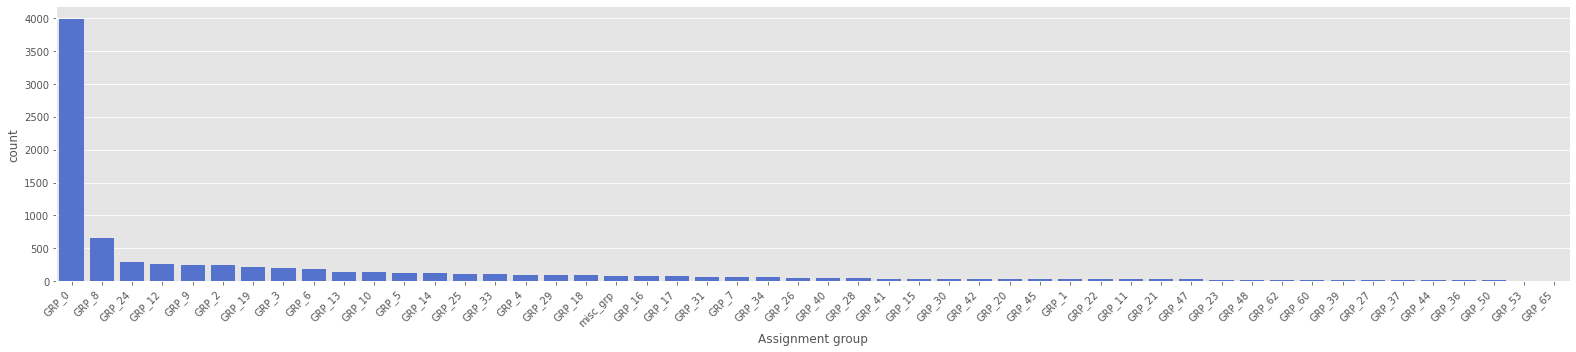

In [ ]:
##Pre-Processing label Encoding on  Assignment Group
import seaborn as sns
import matplotlib.pyplot as plt
#add to remove warning for python 3.6 dependency
import warnings
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

descending_order = itTicketDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#added code for x label rotate 
ax=sns.countplot(x='Assignment group', data=itTicketDF, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Data Cleansing

In [ ]:
#Fill 'Decsription' field entries that have null with blank space
itTicketDF['Description'].fillna(value=' ', inplace=True)

In [ ]:
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

def clean_data(text):
    text=text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove Non Dictionary character-TODO
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text
  
itTicketDF['Description'] = itTicketDF['Description'].apply(clean_data)

In [ ]:
itTicketDF['length']=[len(text) for text in itTicketDF['Description']]
itTicketDF=itTicketDF[itTicketDF['length']>=3]
itTicketDF['Description'] = itTicketDF['Description'].apply(lambda x : " ".join([word for word in x.split() if(len(word)>2)]))

#itTicketDF.drop(['length'],axis=1,inplace= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Translation

In [ ]:
germanwordlist = ['bitte','nicht','konto','probleme','berechtigung','defekt','mehr','ausgetauscht','rechner', 'drucker','teilweise','freigegeben','genannten','anmeldeaccount',
                  'besprochen','werden','durchwahl','oben','einrichten','zeitwirtschaft','seit','morgens','beheben','keine','zeitbuchungen','vorhanden','dringend','fehler',
                  'werk','anmelde','auftrag','kein','skannen','freundlichen','werkzeuge,','hartstoffe','maste','schutzw','fertigung','immer','sehr','zugriff','freundliche',
                  'geehrter','souzarft','noch','verbindungsherstellung','meldung','erneuten','glich','proben','beilageproben','beilage','auswerten','sinterleitstand','reparar',
                  'reparo','rechner','koenigsee','entregar','atualiza','declara','programdntya','funcionando','preciso','hitacni','grergtger','zugriffsrechte','teamleiter',
                  'abholen','wegen','weit','absender','wenn','abrechnung']
pattern = '|'.join(germanwordlist)

pattern

'bitte|nicht|konto|probleme|berechtigung|defekt|mehr|ausgetauscht|rechner|drucker|teilweise|freigegeben|genannten|anmeldeaccount|besprochen|werden|durchwahl|oben|einrichten|zeitwirtschaft|seit|morgens|beheben|keine|zeitbuchungen|vorhanden|dringend|fehler|werk|anmelde|auftrag|kein|skannen|freundlichen|werkzeuge,|hartstoffe|maste|schutzw|fertigung|immer|sehr|zugriff|freundliche|geehrter|souzarft|noch|verbindungsherstellung|meldung|erneuten|glich|proben|beilageproben|beilage|auswerten|sinterleitstand|reparar|reparo|rechner|koenigsee|entregar|atualiza|declara|programdntya|funcionando|preciso|hitacni|grergtger|zugriffsrechte|teamleiter|abholen|wegen|weit|absender|wenn|abrechnung'

In [ ]:
germanDescIndex = itTicketDF[itTicketDF['Description'].str.contains(pattern)].index
germanDescIndex

Int64Index([ 223,  238,  251,  255,  265,  270,  272,  302,  304,  305,
            ...
            8414, 8417, 8419, 8420, 8425, 8427, 8436, 8439, 8467, 8499],
           dtype='int64', length=586)

In [ ]:
# since translation done by googletrans & textblob is giving error while using checking & translating every row, just checking the "Description" for german word like 'bitte'

#Install google translator by pip if not installed
!pip install -q googletrans
from googletrans import Translator

def translateIfRequired(x):
    translator = Translator()
    if translator.detect(x).lang != 'en':
        translatedText = translator.translate(x).text
    else:
        translatedText = x
    return translatedText

In [ ]:
for rowId in germanDescIndex:
    itTicketDF['Description'][rowId] = translateIfRequired(itTicketDF['Description'][rowId])

In [ ]:
germanDescIndex_new = itTicketDF[itTicketDF['Description'].str.contains(pattern)].index
germanDescIndex_new

Int64Index([ 223,  238,  251,  255,  265,  270,  272,  302,  304,  305,
            ...
            8414, 8417, 8419, 8420, 8425, 8427, 8436, 8439, 8467, 8499],
           dtype='int64', length=586)

In [ ]:
itTicketDF['Description'][8232]

'stepfhryhan needs access below collaboration platform links urlaubsplanung file efdl users linnes collaboration platform company inc teamordner linnemann urlaubsplanung file efdl users linnes collaboration platform company inc teamordner linnemann ene allgemeines file efdl users linnes collaboration platform company inc teamordner linnemann allgemeines berirtchtswesen gebiet nord file efdl users linnes collaboration platform company inc teamordner linnemann berirtchtswesen gebiet nord crm teamordner file efdl users linnes collaboration platform company inc teamordner linnemann crm teamordner teamcall teammeeting file efdl users linnes collaboration platform company inc teamordner linnemann teamcall teammeeting top projekte file efdl users linnes collaboration platform company inc teamordner linnemann top projekte hallo sabrthy wie weit sind wir diesem thema habe noch kein ticket erhalten mit freundlichen anwendungstechniker application engineer company deutschland gmbh diese mitteilun

## Combine Description and Short Description

In [ ]:
itTicketDF.reset_index(drop=True,inplace=True)

itTicketDF['Description'] = itTicketDF['Description'].str.strip()
itTicketDF['Description'] = itTicketDF['Description'].str.lower()

from collections import OrderedDict
itTicketDF['Description']=itTicketDF['Description'].str.split().apply(lambda x:OrderedDict.fromkeys(x).keys()).str.join(' ')
itTicketDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8439 entries, 0 to 8438
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8439 non-null   object
 1   Assignment group  8439 non-null   object
 2   length            8439 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 197.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

## Lemmatisation and stop words removal

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

sr = stopwords.words('english')
for i,text in enumerate(itTicketDF['Description']):
  itTicketDF['Description'][i]=" ".join(word for word in text.split(' ') if word not in sr)

# install spacy and plt for gensim  
!pip install -q spacy 
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

itTicketDF['Description'] = itTicketDF['Description'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
itTicketDF['Description'][8232]

'abended job scheduler'

# Perform Spell check

In [ ]:
# !pip install pyspellchecker

# from spellchecker import SpellChecker

# def correctSpelling(text):
#     spell = SpellChecker()
#     spell.word_frequency.load_words(['netweaver','-pron-','caas','hostname','unmonitored','activesync','audiocode','isp','apac','skype','callie','worklist','gsc','verizon',
#                                      'firewall','wifi','downloader','uploaded','crm','mms','iphone','rgds','thx','inbox','prefetch','mbps','website','www','inplant','openstage',
#                                      'costcenter','undeliverable','svC','emea','html','reinstall','upload','jpg','signout','malware','cvss','rar','xls','uplink','ziped','uncaught',
#                                      'xlsx','wlan','webpage','uploader','firefox','callback','acct','abap','svchost','webserviceclient','wlc','sid'])
#     wordlist = [word for word in text.split()]
#     misspelled = spell.unknown(wordlist)
#     for incorrect in misspelled:
#         correct = spell.correction(incorrect)
#         text = text.replace(incorrect, correct)
#     return text

# itTicketDF['Description'] = itTicketDF['Description'].apply(correctSpelling)

### Observation:
- Initial thoughts were to combine the short description & description fields so that the a more comrehensive vocabulary is generated. But this caused sentences to have foreign language & english being combined. This became a deterent in language translation. 
- On checking model accuracy we observed neglible difference when 'Shot Description' was included.
- Similar while performing spell check also, it was observed that model accuracy was not improving. Hence decided against doing this considering the huge time taken to perform the task by pyspellchecker. 

# Topic Modeling


1.   Use Sapcy for lemmatistaion 
2.   Use PyLDAvis for the plot to provide good info on clustering.
3.   Use NLTk explicitly (stop word removal)on each Value in text_combined . 
4.   Use bigram model to cluster relevant data together usings genSIM. 



In [ ]:
!pip install -q pyLDAvis 

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this 
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
#to process the simple_process gensim package as input needed as string 
combined_text=itTicketDF.Description.values.tolist()

In [ ]:
combined_text[1]

'hello team meeting skype etc appear outlook calendar somebody please advise correct kind'

In [ ]:
#Convert  Combined text from each sentense to the words. use of simple_process as it tokenize() internally
#https://radimrehurek.com/gensim/utils.html#gensim.utils.simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(combined_text))

In [ ]:
print(data_words[1])

['hello', 'team', 'meeting', 'skype', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [ ]:
# Build the bigram and trigram models
#https://radimrehurek.com/gensim/models/phrases.html
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
print(bigram_mod[data_words[1]])

['hello', 'team', 'meeting', 'skype', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [ ]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

['hello', 'team', 'meeting', 'skype', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

In [ ]:
print(data_words_bigrams[1])

['hello', 'team', 'meeting', 'skype', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


##### WordCloud usage 

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
wordclouds=' '.join(map(str, data_words_bigrams)) 

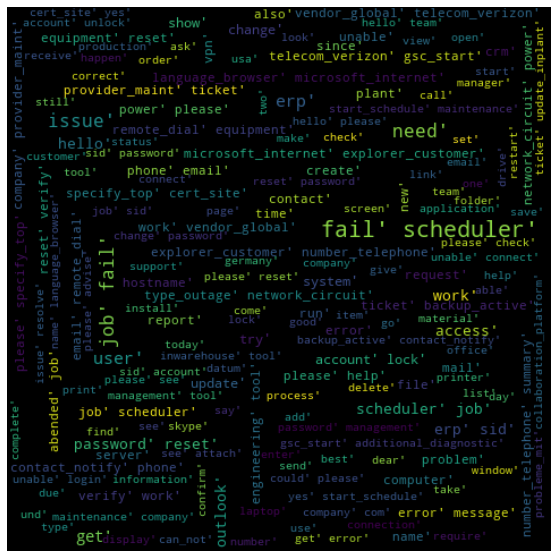

In [ ]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordclouds)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


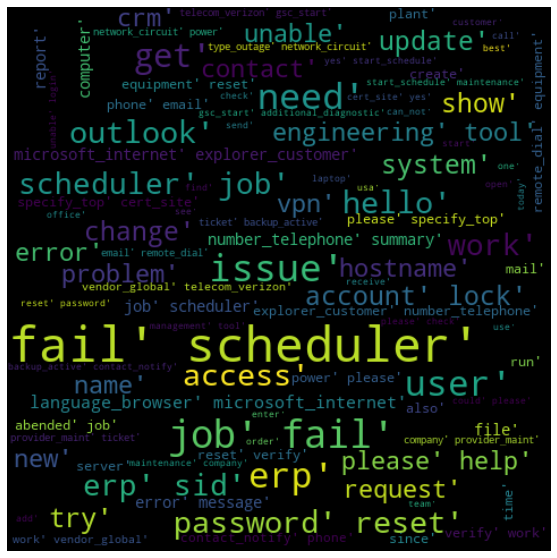

In [ ]:
#check for the word count 100)
wordcloud_2 = WordCloud(width=480, height=480, max_words=100).generate(wordclouds)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
#Copying to new dataframe to create wordclouds on target class

new_df = itTicketDF.copy()
new_df['words'] = data_words_bigrams
new_df

Description  ...                                              words
0     verify user detail employee manager name check...  ...  [verify, user, detail, employee, manager, name...
1     hello team meeting skype etc appear outlook ca...  ...  [hello, team, meeting, skype, etc, appear, out...
2                                  can not log vpn best  ...                          [can_not, log, vpn, best]
3                               unable access tool page  ...                       [unable, access, tool, page]
4                                           skype error  ...                                     [skype, error]
...                                                 ...  ...                                                ...
8434  good afternoon receive email send mail please ...  ...  [good_afternoon, receive, email, send, mail, p...
8435                           telephony software issue  ...                        [telephony_software, issue]
8436       vip windows password reset tifpdchb pedxruyf  ...  [vip, windows, password, reset, tifpdchb, pedx...
8437  unable access machine utility finish drawer ad...  ...  [unable, access, machine, utility, finish, dra...
8438  mehreren lassen sich verschiedene prgramdntyme...  ...  [mehreren, lassen_sich, verschiedene, prgramdn...

[8439 rows x 4 columns]

In [ ]:
#Sorting based on frequency of target class Assignment group

value = new_df['Assignment group'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'misc_grp', 'GRP_16', 'GRP_17',
       'GRP_7', 'GRP_31', 'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41',
       'GRP_15', 'GRP_42', 'GRP_20', 'GRP_45', 'GRP_22', 'GRP_1', 'GRP_11',
       'GRP_21', 'GRP_47', 'GRP_23', 'GRP_62', 'GRP_60', 'GRP_39', 'GRP_30',
       'GRP_27', 'GRP_37', 'GRP_44', 'GRP_36', 'GRP_50', 'GRP_65', 'GRP_53',
       'GRP_48'],
      dtype='object')

In [ ]:
# Creating a function for wordcloud
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

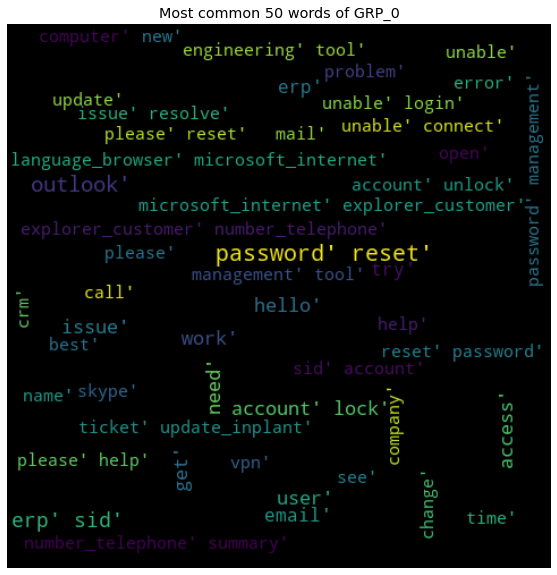

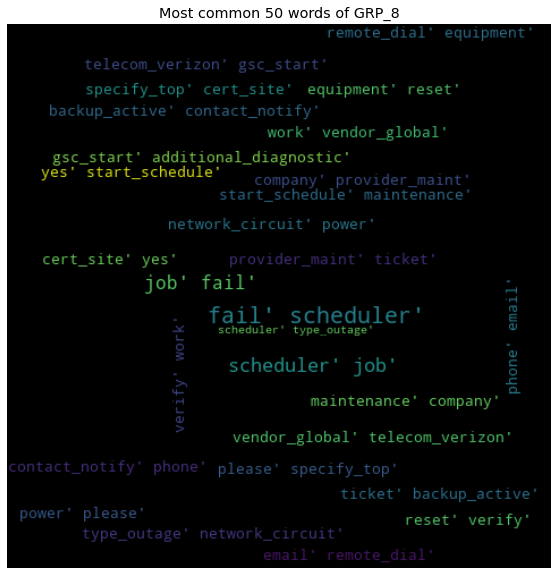

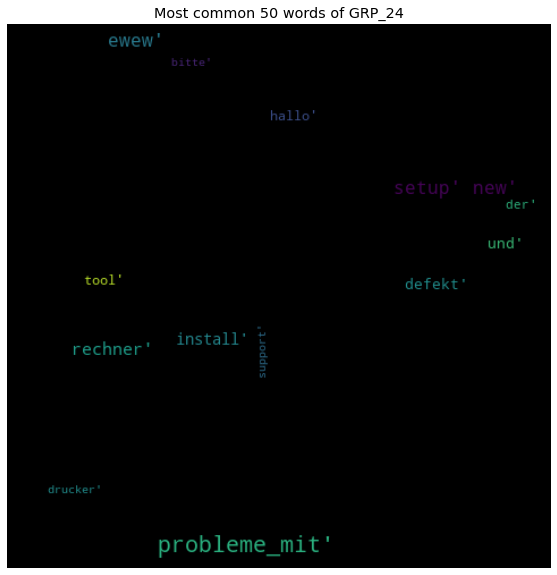

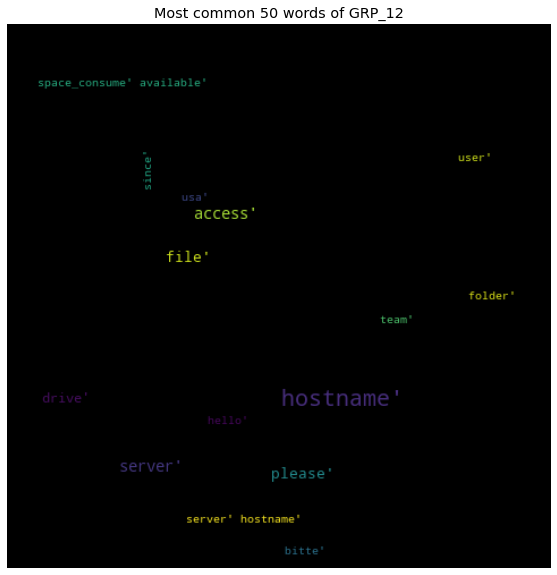

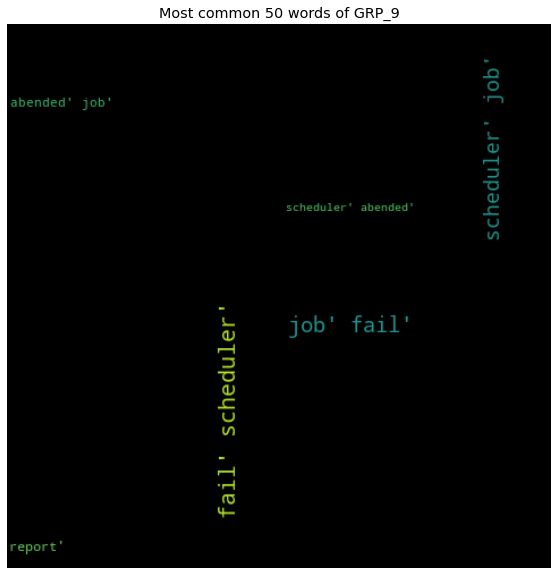

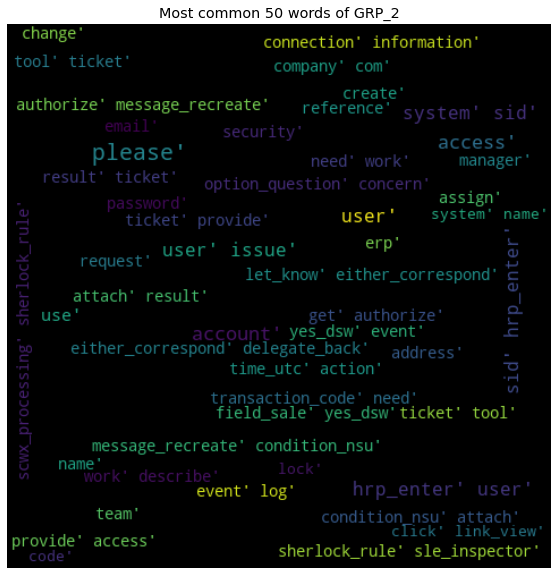

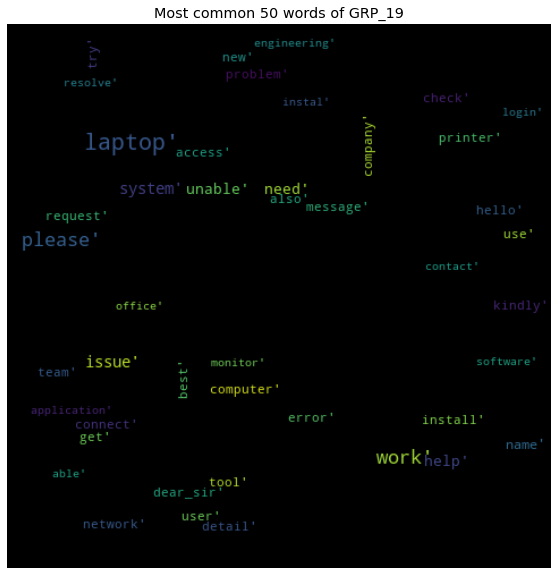

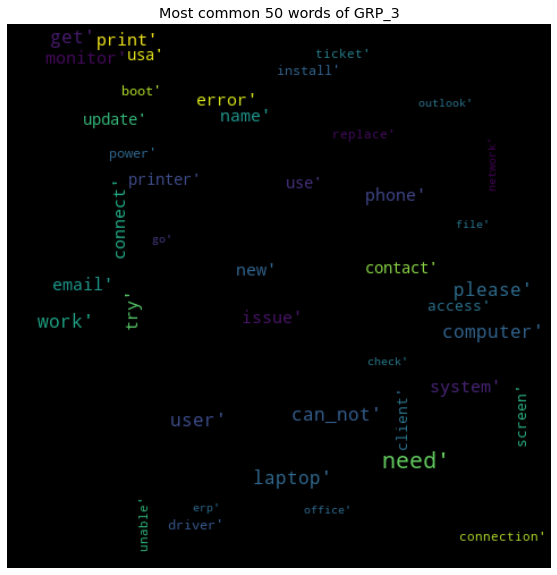

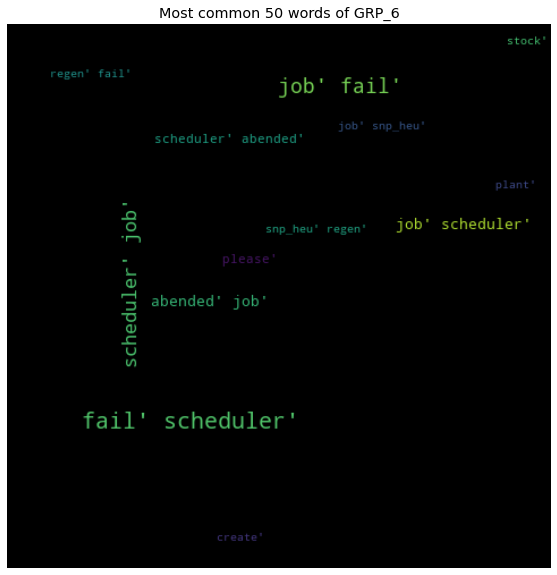

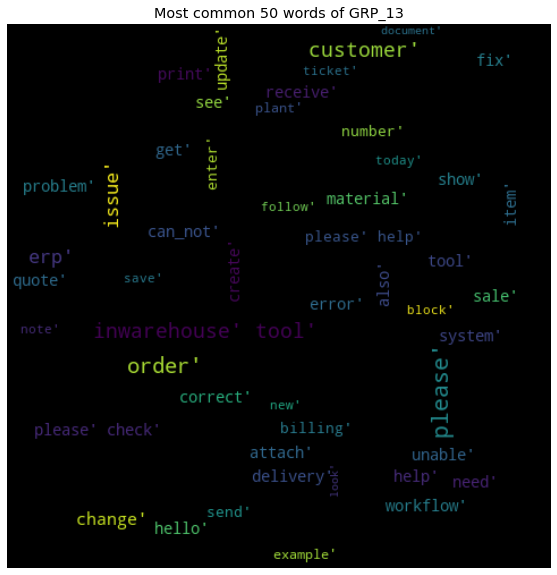

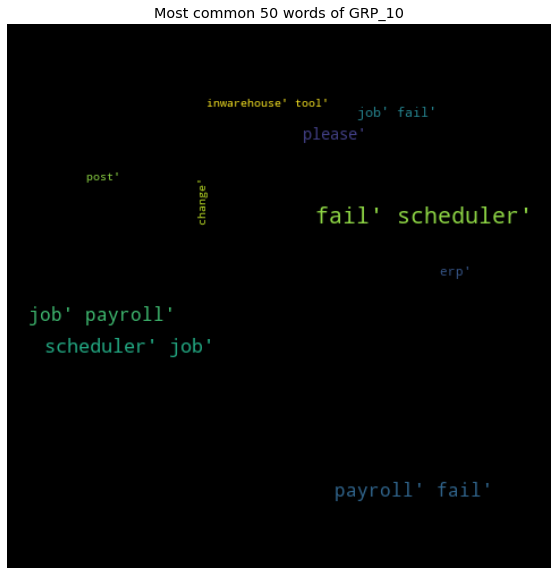

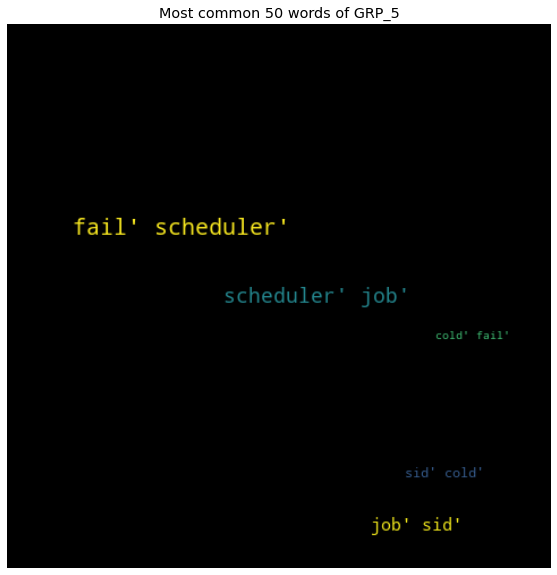

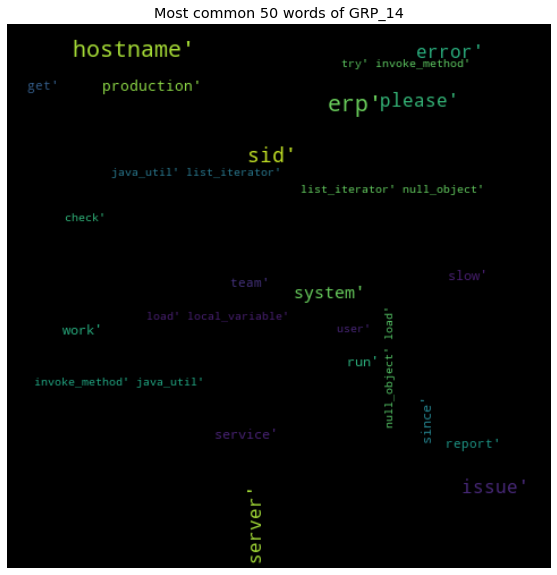

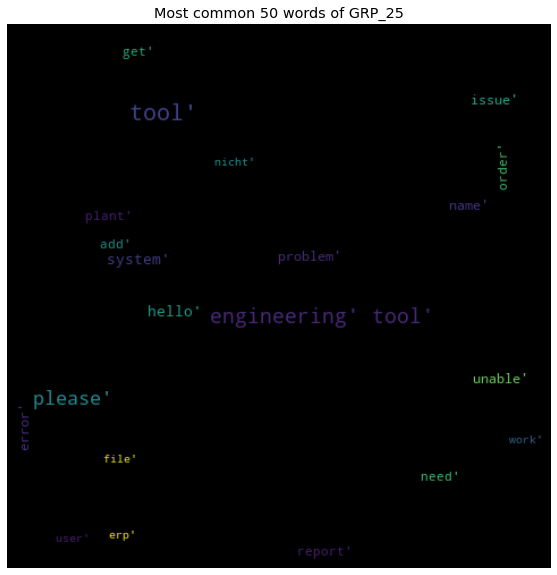

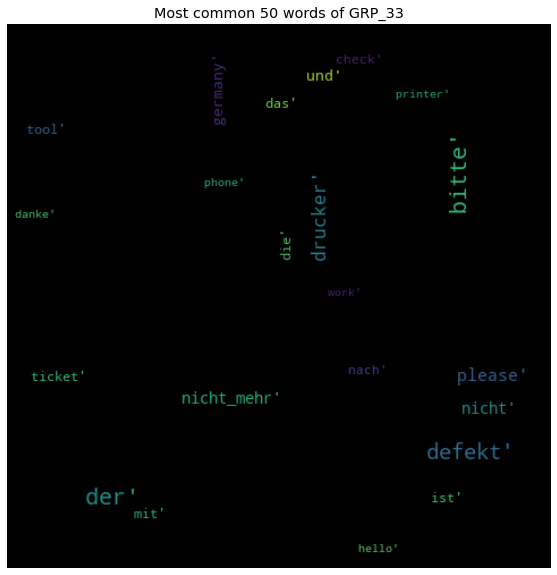

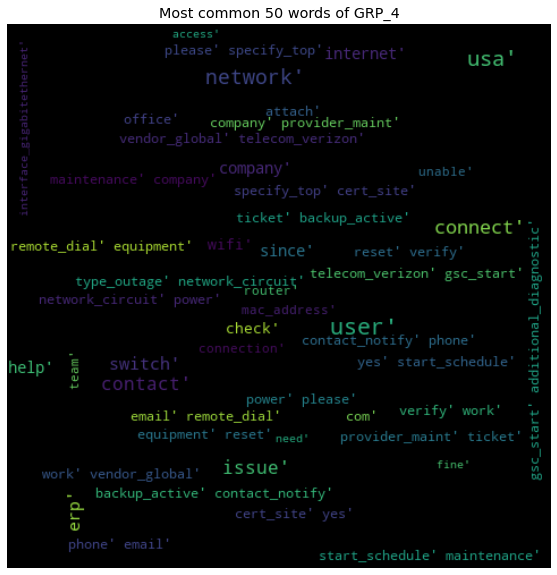

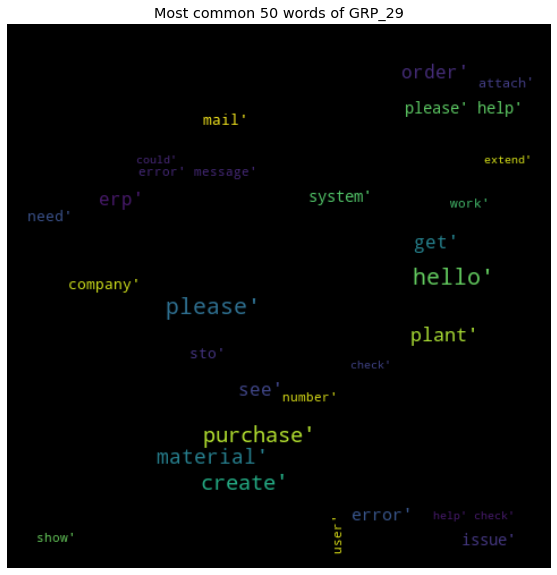

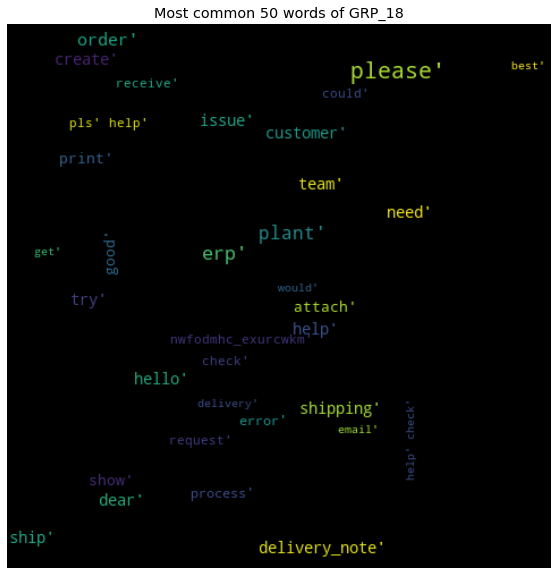

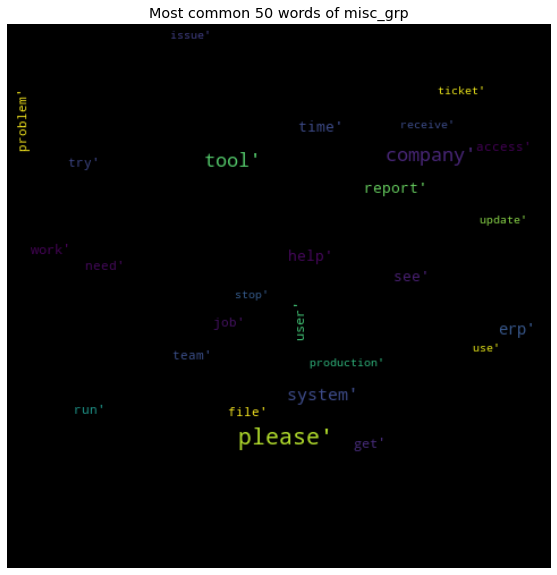

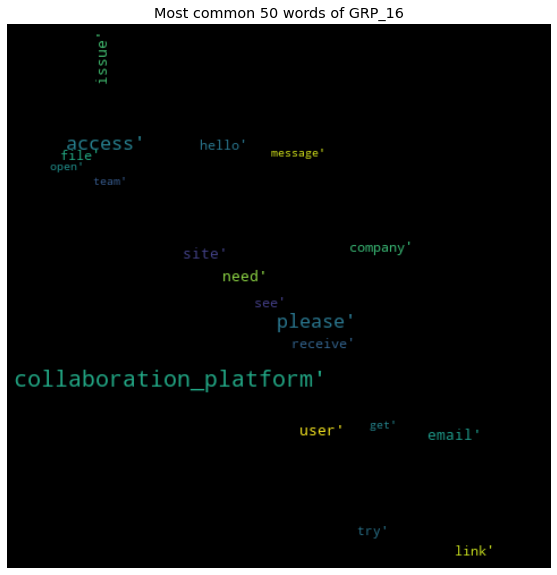

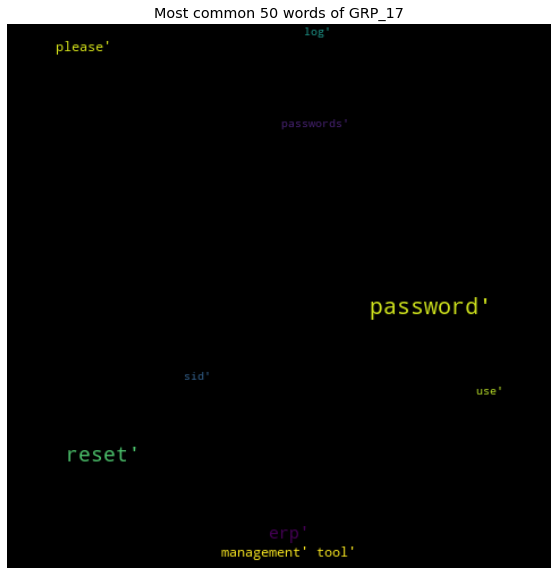

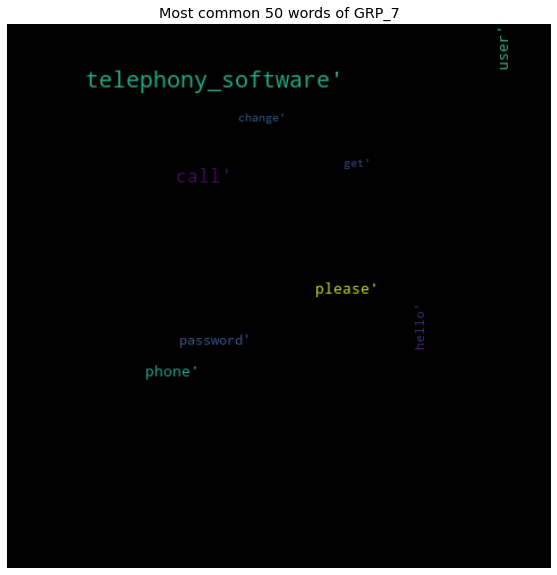

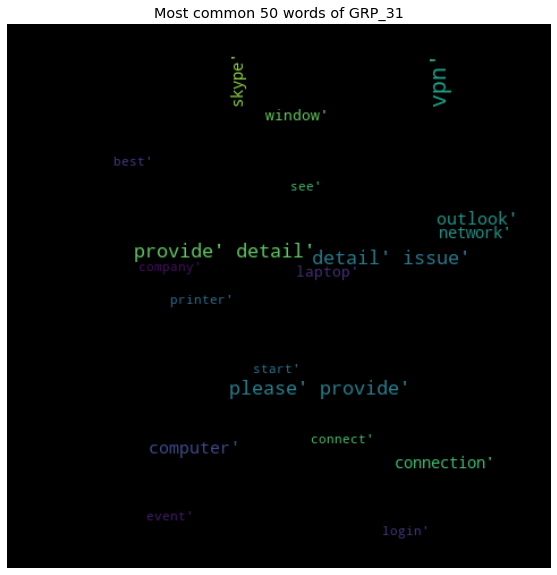

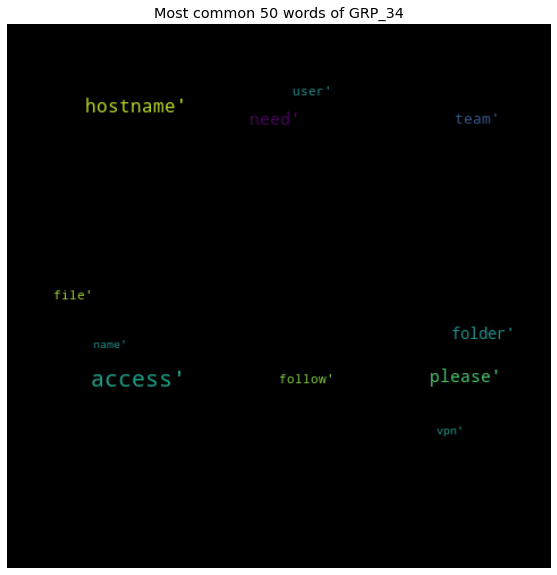

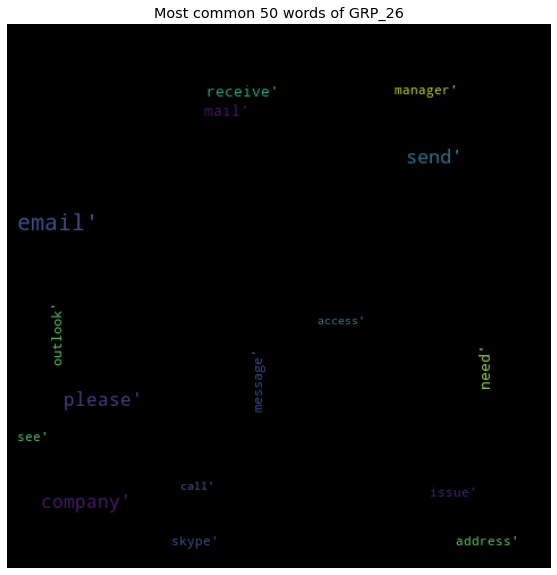

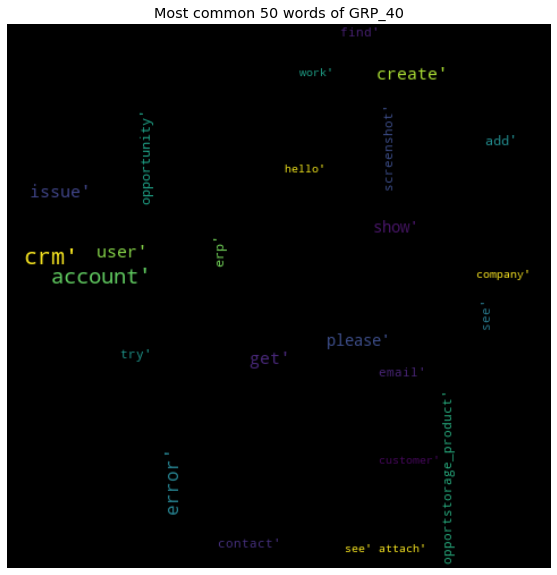

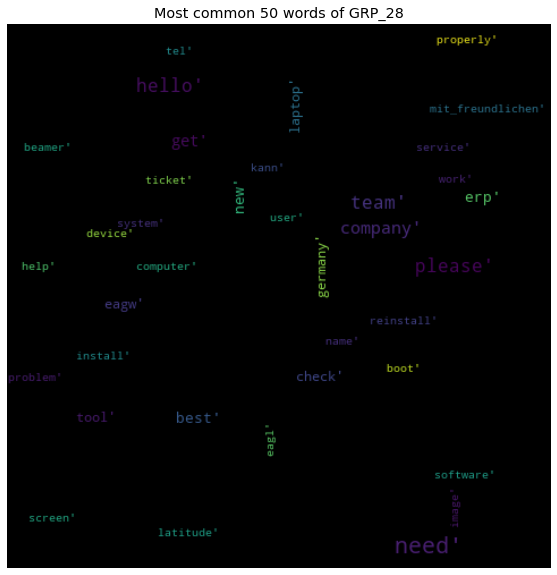

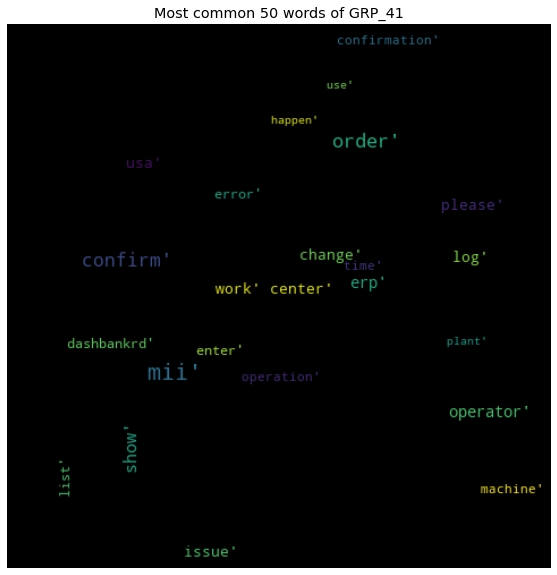

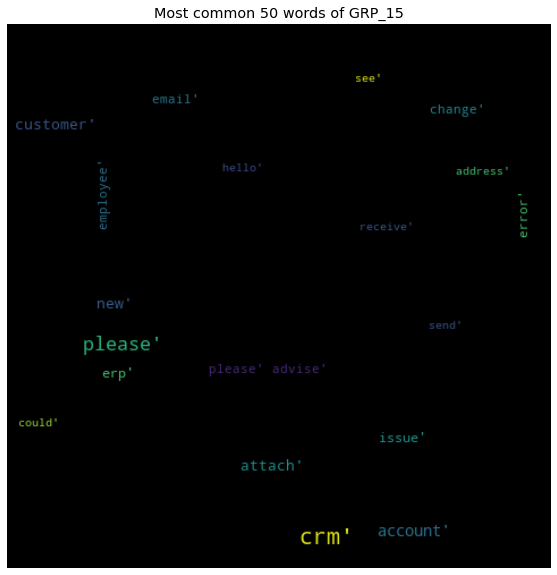

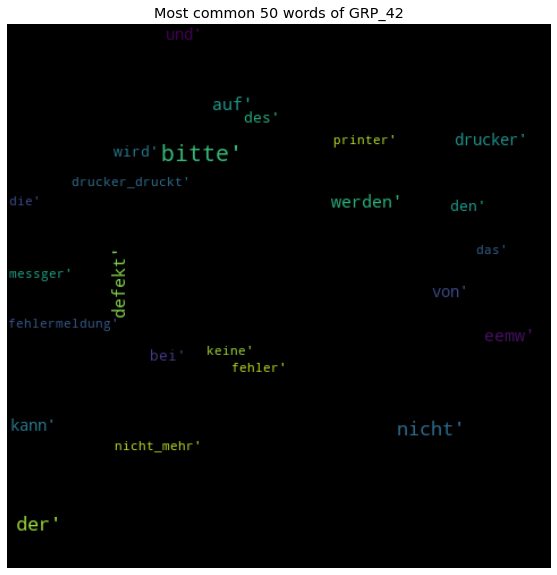

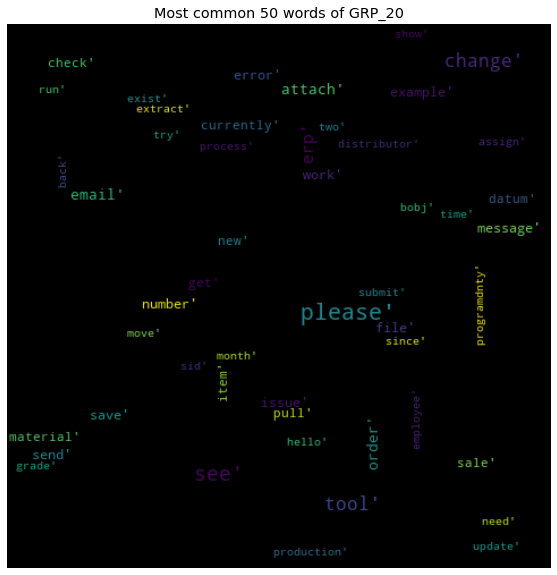

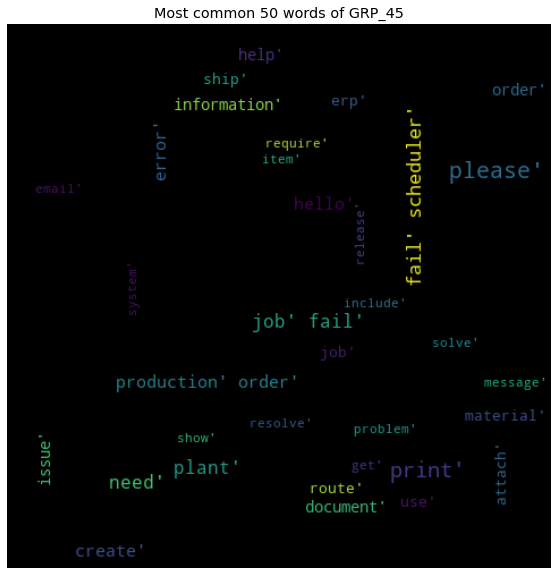

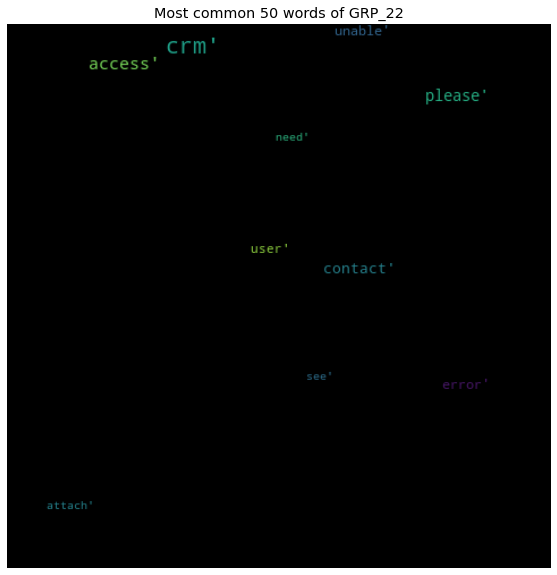

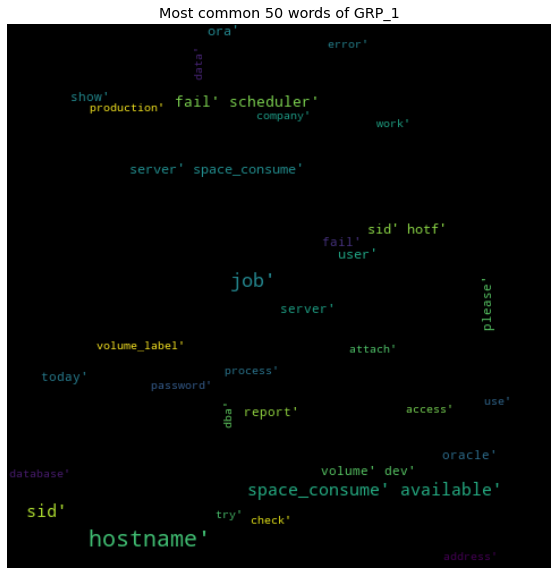

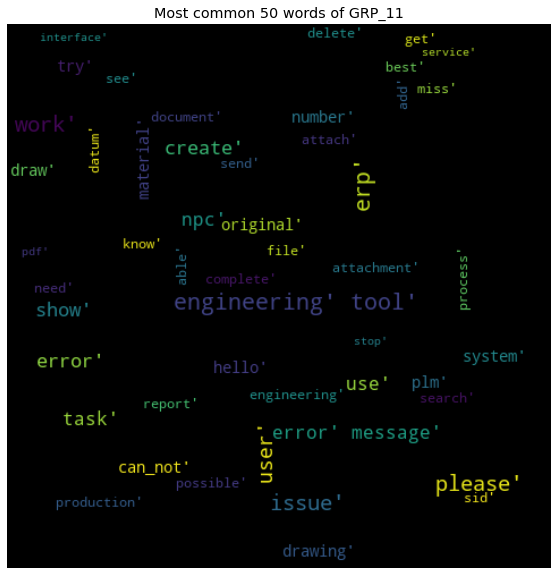

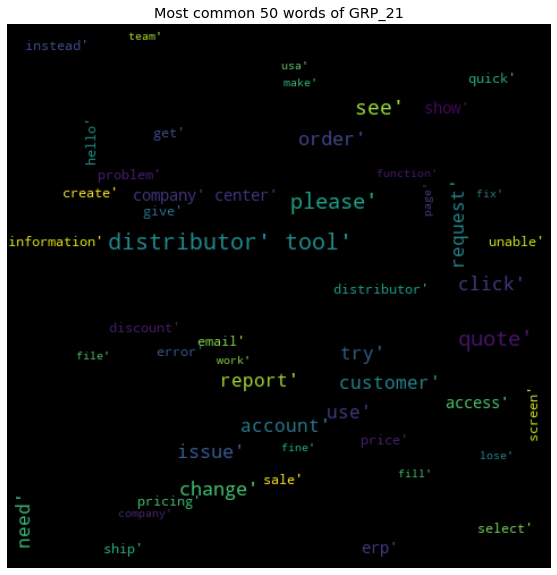

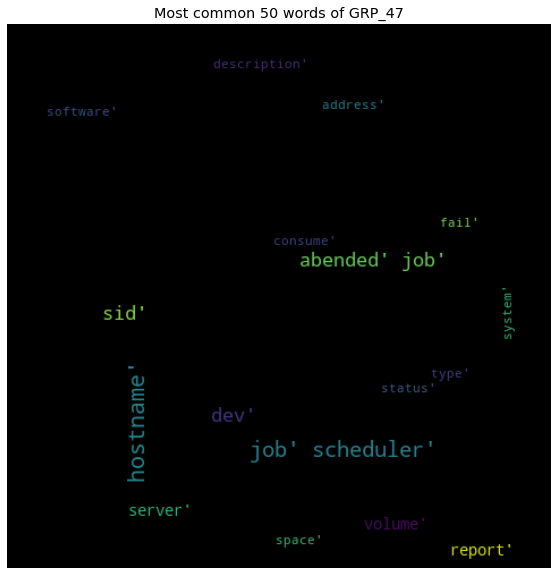

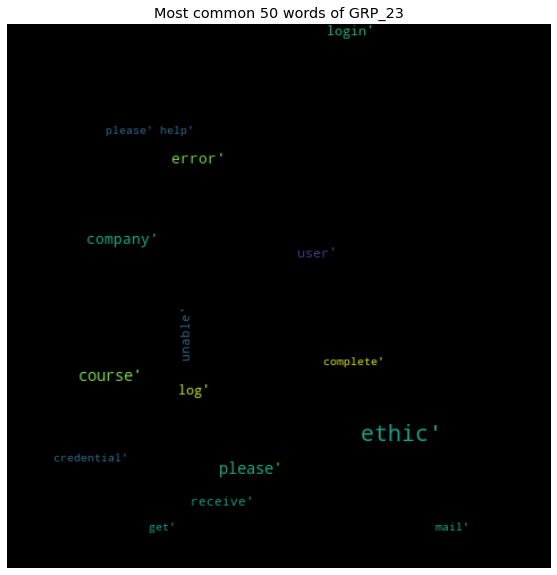

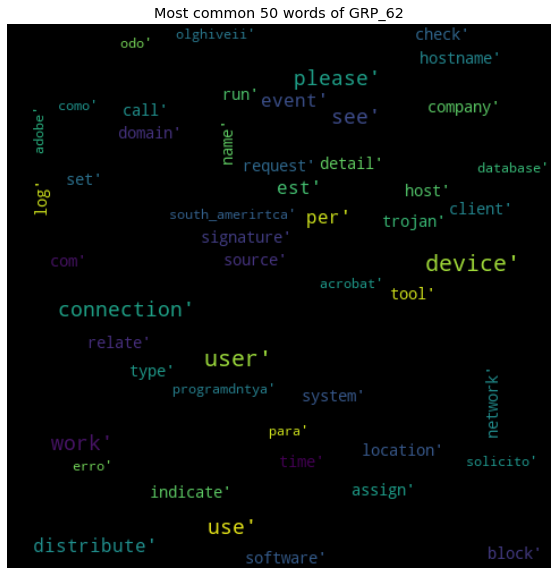

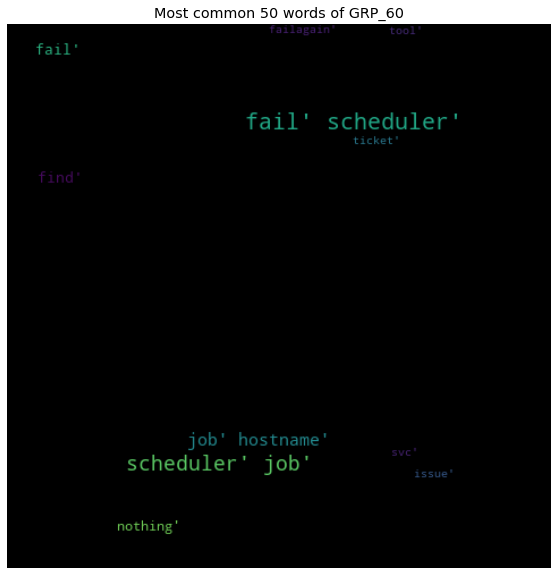

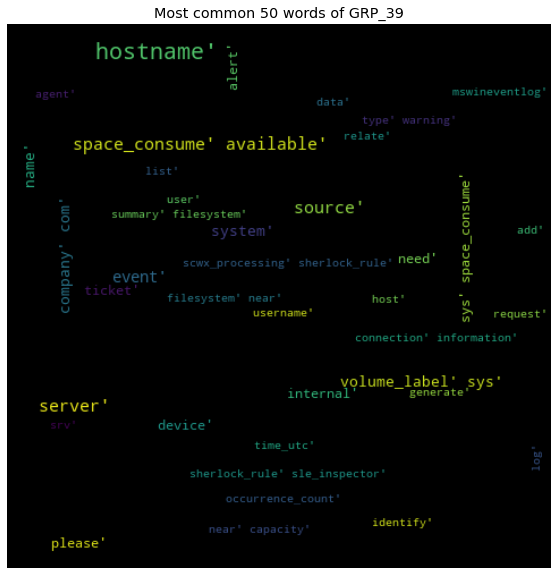

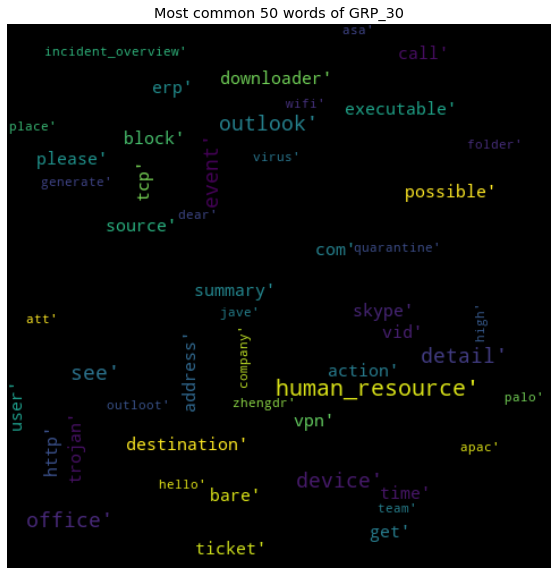

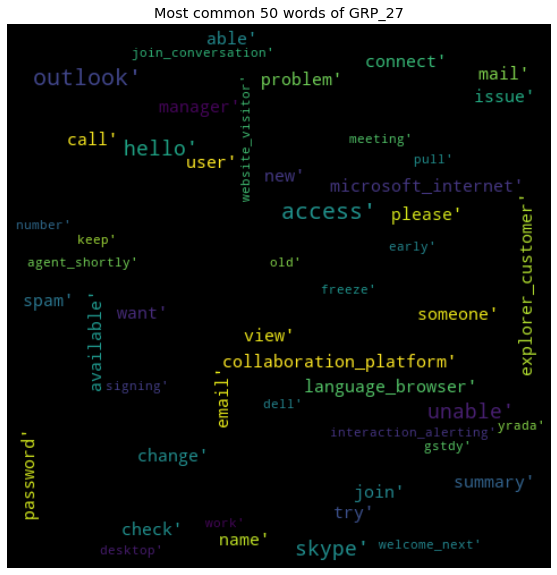

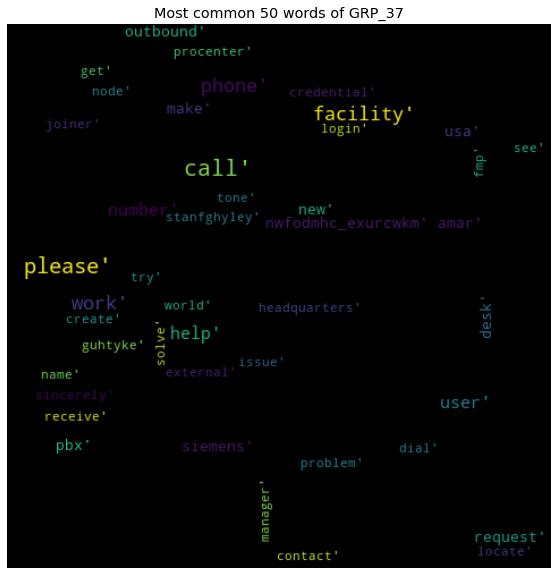

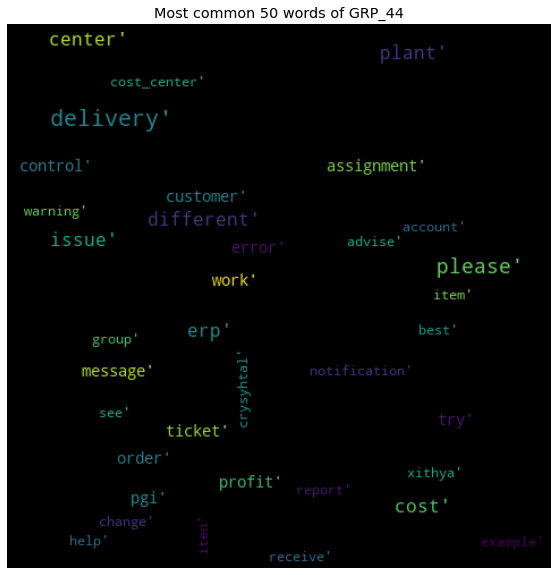

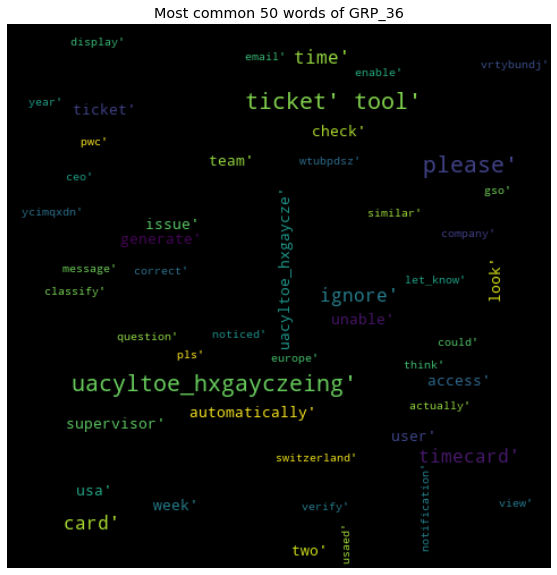

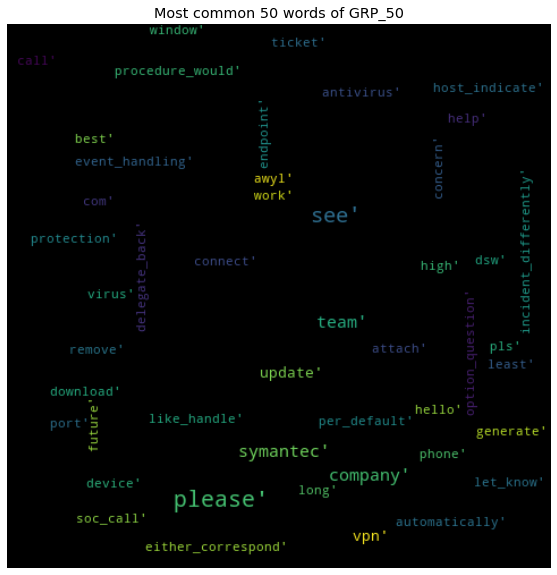

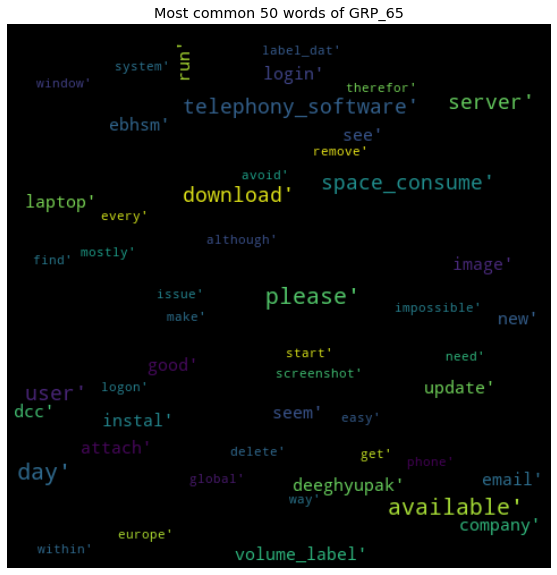

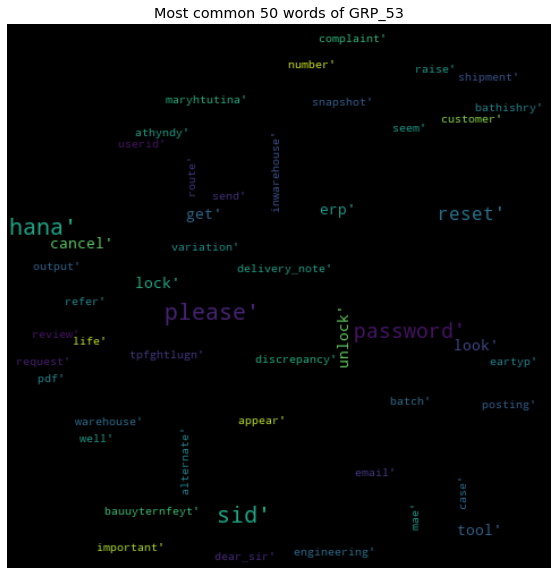

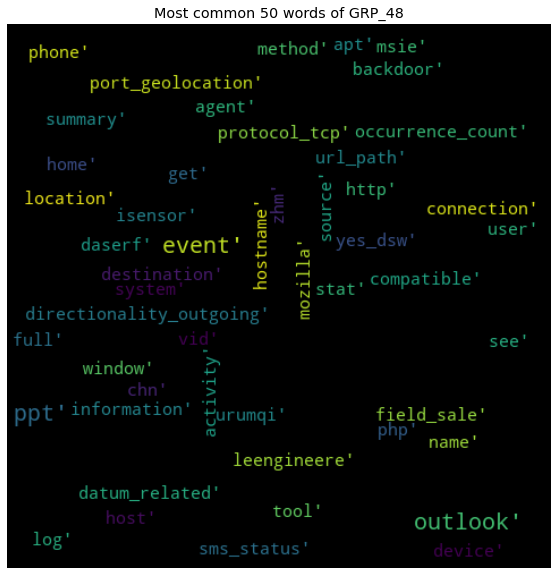

In [ ]:
#for loop to pass the top 50 Assignment groups

for i in range(50):

    Grp = new_df[new_df ['Assignment group'] == value[i]]
    Grp = Grp['words']
    wordcloud_grp(Grp,value[i])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus from post clean data 
texts = data_words_bigrams

# Term Document Frequency and Bag of words 
#https://radimrehurek.com/gensim/corpora/dictionary.html
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# View not human readable 
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]]


In [ ]:
#possible human redable 
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[('able', 1), ('advise', 1), ('caller_confirm', 1), ('check', 2), ('detail', 1), ('employee', 1), ('issue', 1), ('login', 1), ('manager', 1), ('name', 1), ('password', 1), ('reset', 1), ('resolve', 1), ('user', 1), ('verify', 1)]]


Bag of word model is working with bi gram and trigram model getting more insight from the words and its frequencey in document 1  . 


1.   Caller_confirmed occur once in document 1 
2.   check occur twice  in document 1 



In [ ]:
# Build LDA model
#https://radimrehurek.com/gensim/models/ldamodel.html
lda_model = LdaModel(corpus=corpus,id2word=id2word,num_topics=7,random_state=200,update_every=1,chunksize=800,passes=10,alpha='auto',per_word_topics=True)

In [ ]:
#top 7 topics from the corpus 
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.061*"password" + 0.047*"reset" + 0.043*"account" + 0.028*"erp" + '
  '0.025*"please" + 0.024*"lock" + 0.021*"sid" + 0.021*"login" + 0.019*"user" '
  '+ 0.018*"email"'),
 (1,
  '0.014*"hostname" + 0.011*"device" + 0.010*"event" + 0.009*"server" + '
  '0.007*"source" + 0.007*"see" + 0.007*"automatically" + 0.006*"ticket" + '
  '0.006*"example" + 0.005*"company"'),
 (2,
  '0.122*"job" + 0.115*"scheduler" + 0.079*"fail" + 0.050*"abended" + '
  '0.031*"sid" + 0.023*"ticket" + 0.018*"hostname" + 0.011*"update" + '
  '0.008*"update_inplant" + 0.008*"tool"'),
 (3,
  '0.030*"outlook" + 0.026*"laptop" + 0.024*"skype" + 0.022*"unable" + '
  '0.014*"best" + 0.013*"login" + 0.012*"die" + 0.011*"mit_freundlichen" + '
  '0.009*"nicht" + 0.008*"ethic"'),
 (4,
  '0.030*"please" + 0.017*"issue" + 0.015*"error" + 0.015*"access" + '
  '0.014*"tool" + 0.014*"need" + 0.014*"hello" + 0.012*"help" + 0.012*"get" + '
  '0.011*"user"'),
 (5,
  '0.033*"connect" + 0.032*"name" + 0.029*"summary" + 0.020*"

In [ ]:
texts=data_words_bigrams
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -7.428591901336581

Coherence Score:  0.4348565773160605


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.289846 -0.033818       1        1  43.624465
0      0.218325  0.025368       2        1  15.136225
1     -0.053245  0.189733       3        1  10.712534
6     -0.171589 -0.111649       4        1   8.896181
5     -0.023689 -0.131773       5        1   8.859691
2     -0.129430  0.226091       6        1   7.075734
3     -0.130217 -0.163952       7        1   5.695171, topic_info=          Term        Freq       Total Category  logprob  loglift
165        job  806.000000  806.000000  Default  30.0000  30.0000
189  scheduler  758.000000  758.000000  Default  29.0000  29.0000
10    password  867.000000  867.000000  Default  28.0000  28.0000
188       fail  524.000000  524.000000  Default  27.0000  27.0000
11       reset  661.000000  661.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
34      unable  118.838684  663.868708   Topic7  -3.8026   1.1452
7        login   69.274665  362.602362   Topic7  -4.3423   1.2103
865       kann   24.474227   38.108418   Topic7  -5.3827   2.4227
104        crm   34.324632  176.072021   Topic7  -5.0445   1.2305
687        der   24.442171   76.517549   Topic7  -5.3840   1.7243

[362 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
9140      6  0.996709  abended
31        1  0.986949   access
31        5  0.013072   access
94        1  0.017776  account
94        2  0.980889  account
...     ...       ...      ...
89        1  0.513264     work
89        2  0.268776     work
89        5  0.218583     work
1258      7  0.977269    write
277       2  0.996722      yes

[468 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 7, 6, 3, 4])

# Provide info to business 

In [ ]:
# add a deep copy to another dataframe itTicketDF  to other DF
data =  itTicketDF.copy()
data['num_words'] = data.Description.apply(lambda x : len(x.split()))
data.describe().transpose()

count        mean         std  min   25%   50%    75%     max
length     8439.0  141.761228  312.312703  3.0  34.0  58.0  148.0  6190.0
num_words  8439.0   12.130940   18.929437  0.0   3.0   6.0   15.0   434.0

In [ ]:
bins=[0,50,75, np.inf]
data['bins']=pd.cut(data.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])
word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [ ]:
word_distribution

bins  counts
0    0-100    8330
1  100-300      43
2  300-500       7
3  500-800       0
4     >800       0

Text(0.5, 1.0, 'Word distribution per bin')

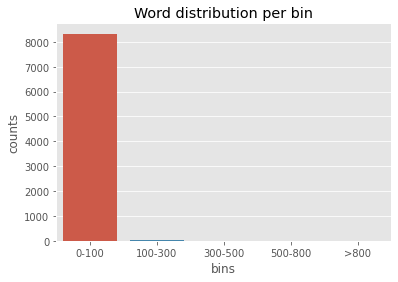

In [ ]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

**Observation**
*   Most of the descrption of the problems raised by callers are short with in 0-100 words
*   Few items are with bit descriptive 



# Generate Dataset for createing 2 models
- Model 1 : Group 0 & all other groups combined to "other"
- Model 2 : Group 0 removed & only includes other groups
- Model 1 will be use dto classing group 0. If not found to be Group 0, we can classify using Model 2.

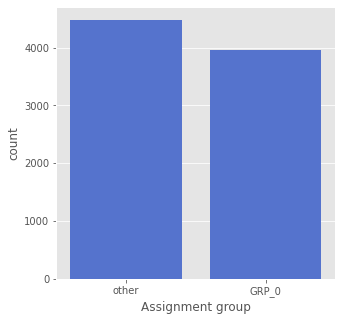

In [ ]:
# Create the Dataset for classifying GRP_0
itTicketGRP0DF = itTicketDF.copy()
itTicketGRP0DF['Assignment group']=itTicketGRP0DF['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

descending_order = itTicketGRP0DF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=itTicketGRP0DF, color='royalblue',order=descending_order)

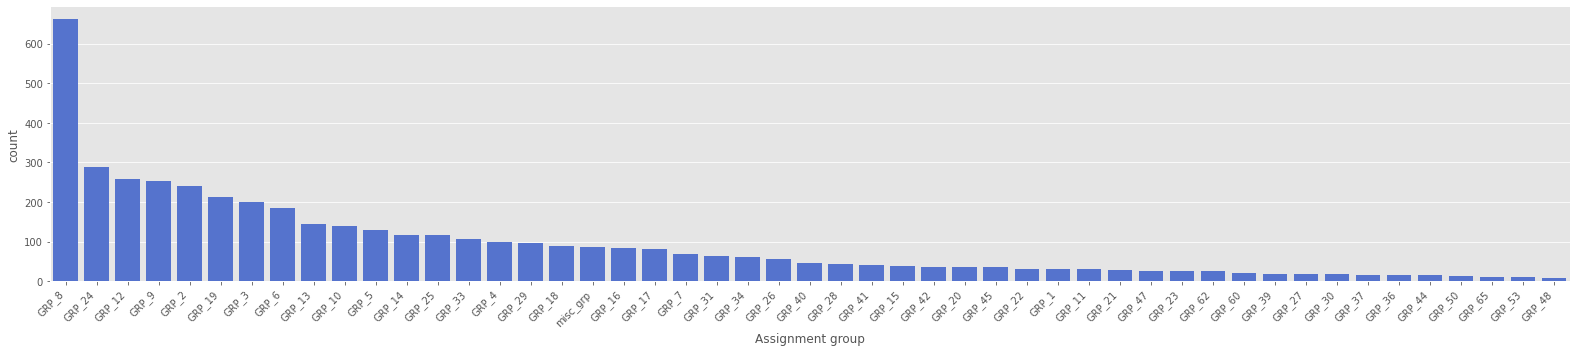

In [ ]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
itTicketOthersDF = itTicketDF[itTicketDF['Assignment group'] != 'GRP_0']

descending_order = itTicketOthersDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketOthersDF, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Observation
- There is high imbalance within the other group

In [ ]:
maxOthers = itTicketOthersDF['Assignment group'].value_counts().max()
maxOthers

661

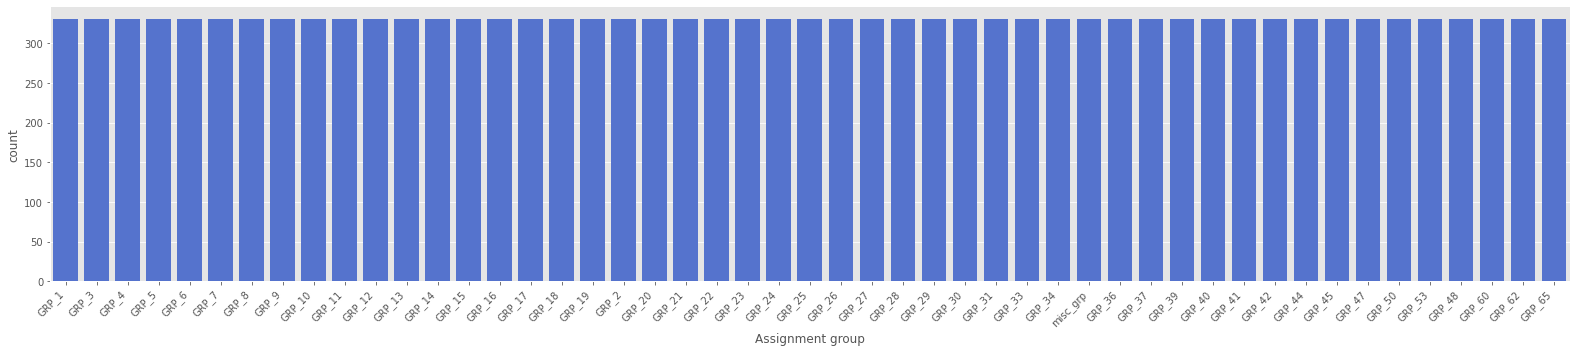

In [ ]:
# Treat the imbalnce in the 'other' dataset by resampling
from sklearn.utils import resample
itTicketOthersDF_resampled = itTicketOthersDF[0:0]
for grp in itTicketOthersDF['Assignment group'].unique():
    itTicketGrpDF = itTicketOthersDF[itTicketOthersDF['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers/2), random_state=123)
    itTicketOthersDF_resampled = itTicketOthersDF_resampled.append(resampled)

otherGrpsResampled = pd.concat([itTicketGRP0DF,itTicketOthersDF_resampled])
otherGrpsResampled.reset_index(inplace=True)

descending_order = itTicketOthersDF_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketOthersDF_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

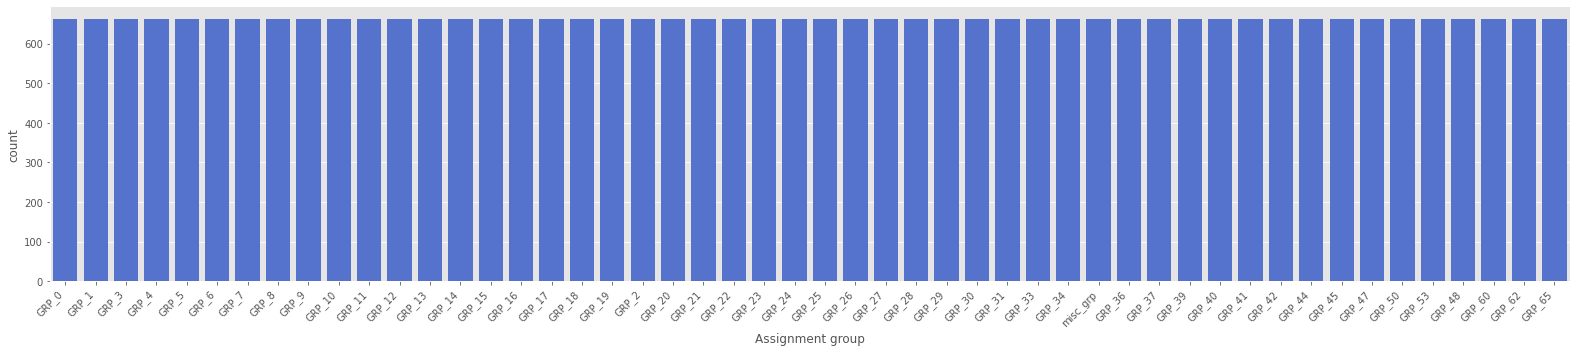

In [ ]:
# Treat the imbalnce in the itTicketDF dataset by resampling to 661.This is for us to try creating a single model which use the whiole dataset & verify the performance
itTicketDF_resampled = itTicketDF[0:0]
for grp in itTicketDF['Assignment group'].unique():
    itTicketGrpDF = itTicketDF[itTicketDF['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers), random_state=123)
    itTicketDF_resampled = itTicketDF_resampled.append(resampled)

descending_order = itTicketDF_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketDF_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Label Encoding 'Assignment group' target class 


In [ ]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

#itTicketGRP0DF['Assignment group'] , grp_mapping_grp0= labelencoder(itTicketGRP0DF['Assignment group'])
#itTicketOthersDF_resampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(itTicketOthersDF_resampled['Assignment group'])
otherGrpsResampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(otherGrpsResampled['Assignment group'])
itTicketDF_resampled['Assignment group'] , grp_mapping_all_resampled= labelencoder(itTicketDF_resampled['Assignment group'])
itTicketDF['Assignment group'],grp_mapping_all_raw = labelencoder(itTicketDF['Assignment group'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


# Modelling

In [ ]:
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Add Function to capture results from each model 
import operator
def captureData(dataframe,modelHistory,modelName,descriptions,index_df,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    index, acc_value = max(enumerate(modelHistory.history['val_accuracy']), key=operator.itemgetter(1))
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'val_accuracy': [acc_value],
      'val_loss':[modelHistory.history['val_loss'][index]],
      'loss':[modelHistory.history['loss'][index]],
      'accuracy':[modelHistory.history['accuracy'][index]],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','val_accuracy' ,'val_loss','loss','accuracy','descriptions']] 
  return dataframe

def capturePrediction(dataframe,modelName,descriptions,index_df,pred_accuracy,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'Pred_Accuracy' : [pred_accuracy],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','Pred_Accuracy','descriptions']] 
  return dataframe


## Word2Vec embedding 

In [ ]:
sentences = [line.split(' ') for line in itTicketDF['Description']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format(project_path+ 'word2vec_vector.txt')

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open(project_path+'word2vec_vector.txt')

for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 10321 word vectors.


In [ ]:
maxlen = 300
numWords=9000
epochs = 10

In [ ]:
results=pd.DataFrame()
pred_results = pd.DataFrame()

### LSTM Model

In [ ]:
class LstmModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['Description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
    lstm=Bidirectional(LSTM(128))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    self.model.summary()
    plot_model(self.model,to_file="LSTM_Model.jpg")

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))

    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",metrics.accuracy_score(self.y_test, pred))
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [ ]:
# Check how the LSTM Model perform with the cleansed data
lstmModelRawData = LstmModel()
lstmModelRawData_history, model = lstmModelRawData.train(itTicketDF,100,epochs)
rawData_accuracy = lstmModelRawData.prediction()

Number of Samples: 8439
Number of Labels:  8439
Number of train Samples: 6751
Number of val Samples: 1688
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 300, 100)          900100    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               234496    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
Total params: 1,165

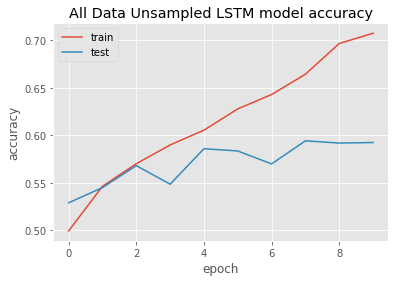

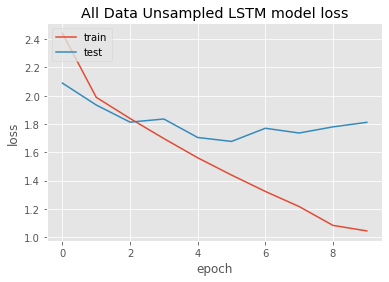

In [ ]:
lstmModelRawData.plotModelAccuracy(lstmModelRawData_history, 'All Data Unsampled LSTM')

In [ ]:
# Check how the LSTM Model perform with all the data which is cleansed & resampled to 661 to make the target balance
lstmModelAllDataResampled = LstmModel()
lstmModelAllDataResampled_history, model = lstmModelAllDataResampled.train(itTicketDF_resampled,100,epochs)
resampled_accuracy = lstmModelAllDataResampled.prediction()


Number of Samples: 33050
Number of Labels:  33050
Number of train Samples: 26440
Number of val Samples: 6610
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 300, 100)          900100    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               234496    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
Total params: 1,

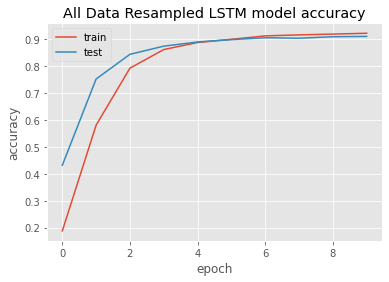

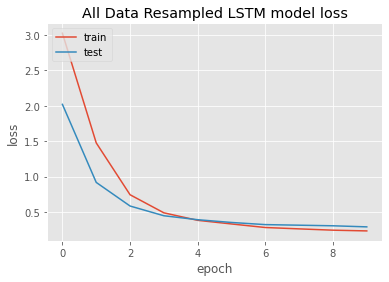

In [ ]:
lstmModelAllDataResampled.plotModelAccuracy(lstmModelAllDataResampled_history, 'All Data Resampled LSTM')

#### Dataframe result capture

In [ ]:
results=pd.DataFrame()
pred_results = pd.DataFrame()
results=captureData(results,lstmModelRawData_history,'LSTM model_WV_rawdata','LSTM+Word2Vec Embedding on raw data','1',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_rawdata','LSTM+Word2Vec Embedding on raw data','1',rawData_accuracy,0)

In [ ]:
results=captureData(results,lstmModelAllDataResampled_history,'LSTM model_WV_resampled data','LSTM+Word2Vec Embedding on Augmented data','2',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_resampled data','LSTM+Word2Vec Embedding on Augmented data','2',resampled_accuracy,0)

### LSTM two part model

In [ ]:
class TwoModel:

  model_1 = Model()
  model_2 = Model()
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return tokenizer,dataframe

  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, X_test, y_train, y_test, X_Val, y_Val

  def runFirstModel(self,dataframe,epochs):

    grp0_df = dataframe.copy()
    grp0_df['Assignment group']=dataframe['Assignment group'].apply(lambda x : 1 if x != 0  else x)
    tokenizer,X = self.wordTokenizer(grp0_df['Description'])
    y = np.asarray(grp0_df['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)

    model_history,self.model_1 = self.modelRunner(X_train,y_train,X_Val,y_Val,epochs)
    return model_history,self.model_1

  def runSecondModel(self, dataframe,epochs):

    grpOthers_df = dataframe.copy()
    grpOthers_df = grpOthers_df[grpOthers_df['Assignment group'] != 0]
    grpOthers_df['Assignment group']=grpOthers_df['Assignment group'] - 1
    tokenizer,X = self.wordTokenizer(grpOthers_df['Description'])
    y = np.asarray(grpOthers_df['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
      
    model_history,self.model_2 = self.modelRunner(X_train,y_train,X_Val,y_Val,epochs)
    return model_history,self.model_2

  def modelRunner(self, X,Y,X_Val,Y_Val,epochs):
        
        input_layer = Input(shape=(maxlen,),dtype=tf.int64)
        embed = Embedding(input_dim = numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #
        lstm=Bidirectional(LSTM(128))(embed)
        drop=Dropout(0.3)(lstm)
        dense =Dense(100,activation='relu')(drop)
        out=Dense(len((pd.Series(Y)).unique()),activation='softmax')(dense)   
        batch_size = 100
        
        model = Model(input_layer,out)
        model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
        
        checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
        reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
        
        model_history = model.fit(X,Y,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,Y_Val))
        return model_history,model

  def predict(self, X_test):
        predBinary = self.model_1.predict(X_test)
        predBinary = [1 if j>i else 0 for i,j in predBinary]

        new_X_test = pd.DataFrame(X_test)
        new_X_test['grp']=predBinary
        sec_input = new_X_test[new_X_test['grp']!=0]
        sec_input.drop(['grp'],inplace=True, axis=1)
        new_X_test=new_X_test[new_X_test['grp']==0]

        predOther = self.model_2.predict(sec_input)
        predOther = [i.argmax() for i in predOther]
        predOther= [i+1 for i in predOther]
        sec_input['grp']=predOther

        pred_df = pd.concat([new_X_test,sec_input])
        pred_df.sort_index(axis=0,inplace=True)

        return np.array(pred_df['grp'])

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()


In [ ]:
model = TwoModel()
model1_history,_ = model.runFirstModel(otherGrpsResampled,5)
model2_history,_ = model.runSecondModel(otherGrpsResampled,20)

tokenizer,X = model.wordTokenizer(otherGrpsResampled['Description'])
y = np.asarray(otherGrpsResampled['Assignment group'])
X = pad_sequences(X, maxlen = maxlen)
_, X_test, _, y_test, _, _ = model.splitData(X,y)

predictions = model.predict(X_test)
twoModel_sampledAccuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy:",twoModel_sampledAccuracy)

Number of Samples: 24609
Number of Labels:  24609
Number of train Samples: 19687
Number of val Samples: 4922
Epoch 1/5
197/197 [==============================] - 15s 60ms/step - loss: 0.3758 - accuracy: 0.8596 - val_loss: 0.2758 - val_accuracy: 0.8876

Epoch 00001: val_accuracy improved from -inf to 0.88765, saving model to model-001-0.887647.h5
Epoch 2/5
197/197 [==============================] - 11s 56ms/step - loss: 0.2215 - accuracy: 0.9086 - val_loss: 0.2105 - val_accuracy: 0.9177

Epoch 00002: val_accuracy improved from 0.88765 to 0.91772, saving model to model-002-0.917716.h5
Epoch 3/5
197/197 [==============================] - 11s 56ms/step - loss: 0.1257 - accuracy: 0.9517 - val_loss: 0.1983 - val_accuracy: 0.9344

Epoch 00003: val_accuracy improved from 0.91772 to 0.93438, saving model to model-003-0.934376.h5
Epoch 4/5
197/197 [==============================] - 11s 57ms/step - loss: 0.0914 - accuracy: 0.9645 - val_loss: 0.2152 - val_accuracy: 0.9323

Epoch 00004: val_accurac

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Accuracy: 0.2706216984965461


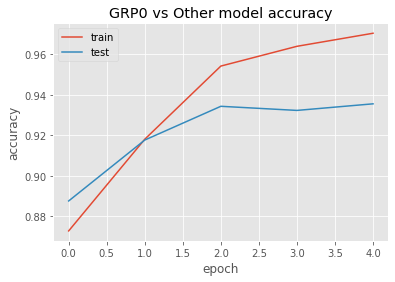

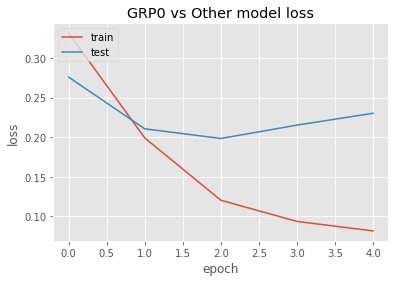

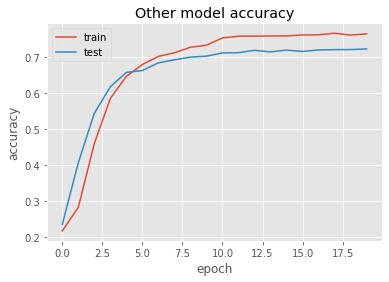

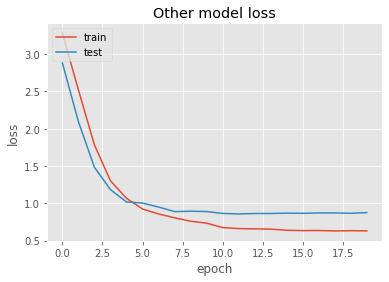

In [ ]:
model.plotModelAccuracy(model1_history, 'GRP0 vs Other')
model.plotModelAccuracy(model2_history, 'Other')

#### Dataframe result capture

In [ ]:
results=captureData(results,model1_history,'LSTM 2 part model_WV_grp0','LSTM+Word2Vec Embedding on grp0_data','3',0)
results=captureData(results,model2_history,'LSTM 2 part model_WV_Others','LSTM+Word2Vec Embedding on Rest of groups','4',0)
pred_results= capturePrediction(pred_results,'LSTM 2 part model_WV','LSTM+Word2Vec Embedding on Augmented data','3',twoModel_sampledAccuracy,0)

## Glove embedding

In [ ]:
#download the glove embedding from https://nlp.stanford.edu/projects/glove/
#glove_file = "/content/drive/My Drive/ML_Project/NLP/NLP-1 Sentiment Classification/" + "glove.6B.zip"
glove_file = project_path + "glove.6B.zip"
print(glove_file)

/content/drive/MyDrive/Capstone Project/glove.6B.zip


In [ ]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [ ]:
# EMBEDDING_FILE = './glove.6B.200d.txt'
EMBEDDING_FILE = './glove.6B.100d.txt'
embeddings_glove = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings_glove[word] = embd

In [ ]:
print("Dimension of the embedding vector is {}".format(len(embeddings_glove["collaboration"])))
print("Dimension of the embedding vector is {}".format(len(embeddings_glove["platform"])))

Dimension of the embedding vector is 100
Dimension of the embedding vector is 100


In [ ]:
maxlen = 300
numWords=9000
epochs = 10

### LSTM Model

In [ ]:
class LstmGloveModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['Description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_glove.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
    lstm=Bidirectional(LSTM(128))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [ ]:
# Check how the LSTM Model perform with the cleansed data
# Check how the LSTM Model perform with the cleansed data
lstmModelRawData = LstmGloveModel()
lstmModelRawData_history, model = lstmModelRawData.train(itTicketDF,100,epochs)
lstm_raw_accuracy = lstmModelRawData.prediction()

Number of Samples: 8439
Number of Labels:  8439
Number of train Samples: 6751
Number of val Samples: 1688
Epoch 1/10
68/68 [==============================] - 7s 66ms/step - loss: 2.9255 - accuracy: 0.4289 - val_loss: 2.0555 - val_accuracy: 0.5314

Epoch 00001: val_accuracy improved from -inf to 0.53140, saving model to model-001-0.531398.h5
Epoch 2/10
68/68 [==============================] - 4s 55ms/step - loss: 1.9552 - accuracy: 0.5578 - val_loss: 1.8603 - val_accuracy: 0.5480

Epoch 00002: val_accuracy improved from 0.53140 to 0.54799, saving model to model-002-0.547986.h5
Epoch 3/10
68/68 [==============================] - 4s 56ms/step - loss: 1.7468 - accuracy: 0.5758 - val_loss: 1.7388 - val_accuracy: 0.5741

Epoch 00003: val_accuracy improved from 0.54799 to 0.57405, saving model to model-003-0.574052.h5
Epoch 4/10
68/68 [==============================] - 4s 55ms/step - loss: 1.5731 - accuracy: 0.5986 - val_loss: 1.6953 - val_accuracy: 0.5812

Epoch 00004: val_accuracy improved 

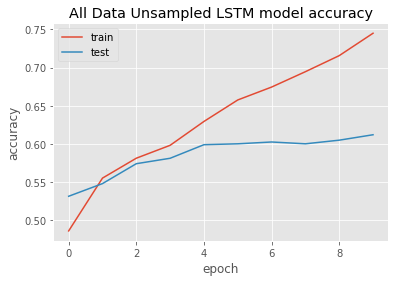

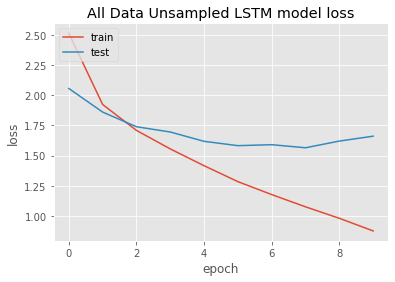

In [ ]:
lstmModelRawData.plotModelAccuracy(lstmModelRawData_history, 'All Data Unsampled LSTM')

In [ ]:
#Check how the LSTM Model perform with all the data which is cleansed & resampled to 661 to make the target balance
lstmModelAllDataResampled = LstmGloveModel()
lstmModelAllDataResampled_history, model = lstmModelAllDataResampled.train(itTicketDF_resampled,100,epochs)
lstm_allResampled_accuracy = lstmModelAllDataResampled.prediction()

Number of Samples: 33050
Number of Labels:  33050
Number of train Samples: 26440
Number of val Samples: 6610
Epoch 1/10
265/265 [==============================] - 19s 58ms/step - loss: 3.2664 - accuracy: 0.1742 - val_loss: 1.3513 - val_accuracy: 0.6303

Epoch 00001: val_accuracy improved from -inf to 0.63026, saving model to model-001-0.630257.h5
Epoch 2/10
265/265 [==============================] - 15s 56ms/step - loss: 1.1863 - accuracy: 0.6798 - val_loss: 0.7077 - val_accuracy: 0.7976

Epoch 00002: val_accuracy improved from 0.63026 to 0.79758, saving model to model-002-0.797579.h5
Epoch 3/10
265/265 [==============================] - 15s 56ms/step - loss: 0.6524 - accuracy: 0.8137 - val_loss: 0.4980 - val_accuracy: 0.8560

Epoch 00003: val_accuracy improved from 0.79758 to 0.85598, saving model to model-003-0.855976.h5
Epoch 4/10
265/265 [==============================] - 15s 55ms/step - loss: 0.4679 - accuracy: 0.8637 - val_loss: 0.3815 - val_accuracy: 0.8821

Epoch 00004: val_acc

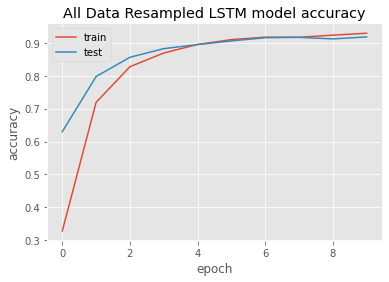

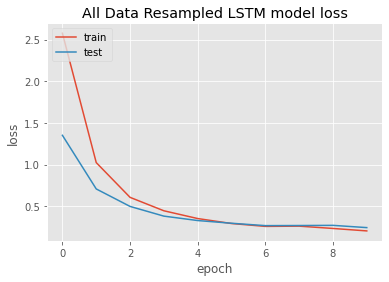

In [ ]:
lstmModelAllDataResampled.plotModelAccuracy(lstmModelAllDataResampled_history, 'All Data Resampled LSTM')

#### Dataframe result capture

In [ ]:
results=captureData(results,lstmModelRawData_history,'LSTM model_GloVe_rawdata','LSTM+GloVe Embedding on raw data','5',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_rawdata','LSTM+GloVe Embedding on raw data','4',lstm_raw_accuracy,0)

In [ ]:
results=captureData(results,lstmModelAllDataResampled_history,'LSTM model_GloVe_resampled data','LSTM+GloVe Embedding on Augmented data','6',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_resampled data','LSTM+GloVe Embedding on Augmented data','5',lstm_allResampled_accuracy,0)

### GRU Model

In [ ]:
class GruGloveModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['Description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
    gru=GRU(128)(embed)
    drop=Dropout(0.3)(gru)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    # self.model.summary()
    # plot_model(self.model,to_file="GRU.jpg")

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy=metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

  def plotModel(self):
    self.model.summary()

In [ ]:
# Check how the GRU Model perform with the cleansed data
# Check how the LSTM Model perform with the cleansed data
gruModelRawData = GruGloveModel()
gruModelRawData_history, model = gruModelRawData.train(itTicketDF,100,epochs)
gruRaw_accuracy = gruModelRawData.prediction()

Number of Samples: 8439
Number of Labels:  8439
Number of train Samples: 6751
Number of val Samples: 1688
Epoch 1/10
68/68 [==============================] - 4s 38ms/step - loss: 2.8696 - accuracy: 0.4251 - val_loss: 2.1132 - val_accuracy: 0.5267

Epoch 00001: val_accuracy improved from -inf to 0.52666, saving model to model-001-0.526659.h5
Epoch 2/10
68/68 [==============================] - 2s 30ms/step - loss: 2.0714 - accuracy: 0.5374 - val_loss: 1.9674 - val_accuracy: 0.5338

Epoch 00002: val_accuracy improved from 0.52666 to 0.53377, saving model to model-002-0.533768.h5
Epoch 3/10
68/68 [==============================] - 2s 31ms/step - loss: 1.9100 - accuracy: 0.5554 - val_loss: 1.9034 - val_accuracy: 0.5604

Epoch 00003: val_accuracy improved from 0.53377 to 0.56043, saving model to model-003-0.560427.h5
Epoch 4/10
68/68 [==============================] - 2s 31ms/step - loss: 1.6943 - accuracy: 0.5942 - val_loss: 1.7875 - val_accuracy: 0.5622

Epoch 00004: val_accuracy improved 

In [ ]:
gruModelRawData.plotModel()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 300, 100)          900100    
_________________________________________________________________
gru (GRU)                    (None, 128)               88320     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
Total params: 1,006,370
Trainable params: 1,006,370
Non-trainable params: 0
________________________________________________

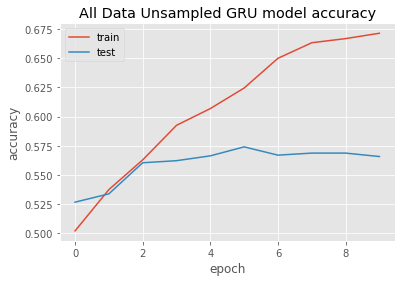

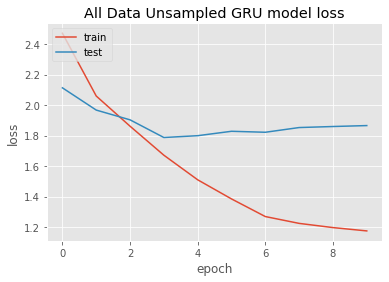

In [ ]:
gruModelRawData.plotModelAccuracy(gruModelRawData_history, 'All Data Unsampled GRU')

In [ ]:
# Check how the GRU Model perform with all the data which is cleansed & resampled to 661 to make the target balance
gruModelAllDataResampled = GruGloveModel()
gruModelAllDataResampled_history, model = gruModelAllDataResampled.train(itTicketDF_resampled,100,epochs)
gruResampled_accuracy = gruModelAllDataResampled.prediction()

Number of Samples: 33050
Number of Labels:  33050
Number of train Samples: 26440
Number of val Samples: 6610
Epoch 1/10
265/265 [==============================] - 10s 33ms/step - loss: 3.4969 - accuracy: 0.1068 - val_loss: 1.8094 - val_accuracy: 0.5221

Epoch 00001: val_accuracy improved from -inf to 0.52209, saving model to model-001-0.522088.h5
Epoch 2/10
265/265 [==============================] - 8s 31ms/step - loss: 1.4940 - accuracy: 0.5829 - val_loss: 0.7464 - val_accuracy: 0.8011

Epoch 00002: val_accuracy improved from 0.52209 to 0.80106, saving model to model-002-0.801059.h5
Epoch 3/10
265/265 [==============================] - 8s 32ms/step - loss: 0.6351 - accuracy: 0.8237 - val_loss: 0.4694 - val_accuracy: 0.8700

Epoch 00003: val_accuracy improved from 0.80106 to 0.87005, saving model to model-003-0.870045.h5
Epoch 4/10
265/265 [==============================] - 8s 31ms/step - loss: 0.4081 - accuracy: 0.8833 - val_loss: 0.3771 - val_accuracy: 0.8912

Epoch 00004: val_accura

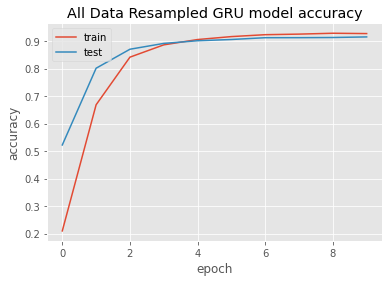

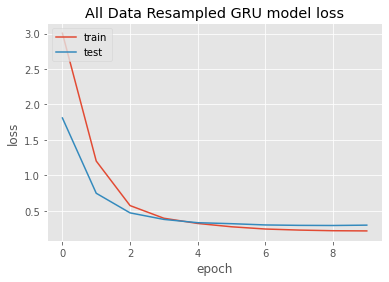

In [ ]:
gruModelAllDataResampled.plotModelAccuracy(gruModelAllDataResampled_history, 'All Data Resampled GRU')

#### Dataframe result capture

In [ ]:
results=captureData(results,gruModelRawData_history,'GRU model_GloVe_rawdata','GRU+GloVe Embedding on raw data','7',0)
pred_results= capturePrediction(pred_results,'GRU model_GloVe_rawdata','GRU+GloVe Embedding on raw data','6',gruRaw_accuracy,0)

In [ ]:
results=captureData(results,gruModelAllDataResampled_history,'GRU model_GloVe_resampled data','GRU+GloVe Embedding on Augmented data','8',0)
pred_results= capturePrediction(pred_results,'GRU model_GloVe_resampled data','GRU+GloVe Embedding on Augmented data','7',gruResampled_accuracy,0)

### RNN Model 

In [ ]:
class RNNGloveModel:
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['Description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_glove.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) # changed by Abraham
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def train(self, dataframe, batch_size, epochs):
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)

    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)
    model=Sequential()
    model.add(Input(shape=(maxlen,),dtype=tf.int64))
    model.add(embed)
    model.add(Conv1D(100,10,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Conv1D(100,10,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dropout(0.3))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(len((pd.Series(y_train)).unique()),activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    model.summary()
    plot_model(model,to_file="RNN.jpg")

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val, y_Val))
    return model_history, model

  def prediction(self,model):
      
     pred = model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [ ]:
# Check how the RNN Model perform with the cleansed data
RNNModelRawData = RNNGloveModel()
RNNModelRawData_history, RnnModel = RNNModelRawData.train(itTicketDF,100,epochs)
RNNModelRawData_accuracy = RNNModelRawData.prediction(RnnModel)

Number of Samples: 8439
Number of Labels:  8439
Number of train Samples: 6751
Number of val Samples: 1688
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 300, 100)          900100    
_________________________________________________________________
conv1d (Conv1D)              (None, 291, 100)          100100    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 145, 100)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 145, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 136, 100)          100100    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 68, 100)           0         
________________

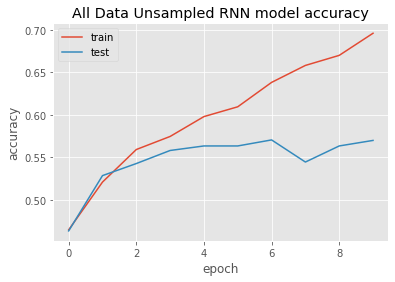

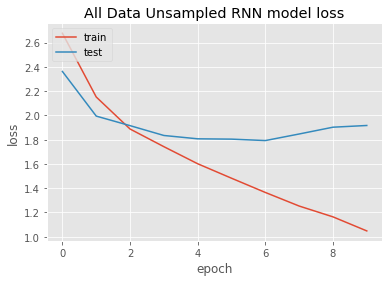

In [ ]:
RNNModelRawData.plotModelAccuracy(RNNModelRawData_history, 'All Data Unsampled RNN')

In [ ]:
#Check how the RNN Model perform with all the data which is cleansed & resampled to 661 to make the target balance
RNNModelAllDataResampled = RNNGloveModel()
RNNModelAllDataResampled_history, RnnModel = RNNModelAllDataResampled.train(itTicketDF_resampled,100,epochs)
RNNModelResampled_accuracy = RNNModelAllDataResampled.prediction(RnnModel)

Number of Samples: 33050
Number of Labels:  33050
Number of train Samples: 26440
Number of val Samples: 6610
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 300, 100)          900100    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 291, 100)          100100    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 145, 100)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 145, 100)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 136, 100)          100100    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 68, 100)           0         
___________

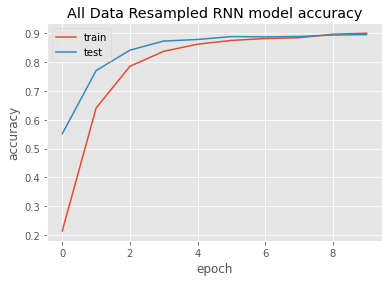

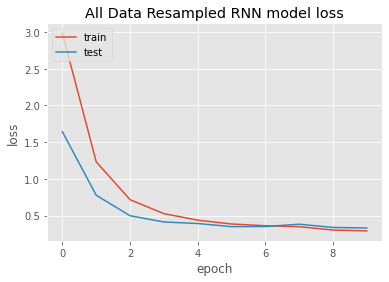

In [ ]:
RNNModelAllDataResampled.plotModelAccuracy(RNNModelAllDataResampled_history, 'All Data Resampled RNN')

#### Dataframe result capture

In [ ]:
# results=pd.DataFrame()
results=captureData(results,RNNModelRawData_history,'RNN model_GloVe_rawdata','RNN+GloVe Embedding on raw data','9',0)
pred_results= capturePrediction(pred_results,'RNN model_GloVe_rawdata','RNN+GloVe Embedding on raw data','8',RNNModelRawData_accuracy,0)

In [ ]:
results=captureData(results,RNNModelAllDataResampled_history,'RNN model_GloVe_resampled data','RNN+GloVe Embedding on Augmented data','10',0)
pred_results= capturePrediction(pred_results,'RNN model_GloVe_resampled data','RNN+GloVe Embedding on Augmented data','9',RNNModelResampled_accuracy,0)

In [ ]:
results

model  ...                               descriptions
1             LSTM model_WV_rawdata  ...        LSTM+Word2Vec Embedding on raw data
2      LSTM model_WV_resampled data  ...  LSTM+Word2Vec Embedding on Augmented data
3         LSTM 2 part model_WV_grp0  ...       LSTM+Word2Vec Embedding on grp0_data
4       LSTM 2 part model_WV_Others  ...  LSTM+Word2Vec Embedding on Rest of groups
5          LSTM model_GloVe_rawdata  ...           LSTM+GloVe Embedding on raw data
6   LSTM model_GloVe_resampled data  ...     LSTM+GloVe Embedding on Augmented data
7           GRU model_GloVe_rawdata  ...            GRU+GloVe Embedding on raw data
8    GRU model_GloVe_resampled data  ...      GRU+GloVe Embedding on Augmented data
9           RNN model_GloVe_rawdata  ...            RNN+GloVe Embedding on raw data
10   RNN model_GloVe_resampled data  ...      RNN+GloVe Embedding on Augmented data

[10 rows x 6 columns]

In [ ]:
pred_results

model  ...                               descriptions
1            LSTM model_WV_rawdata  ...        LSTM+Word2Vec Embedding on raw data
2     LSTM model_WV_resampled data  ...  LSTM+Word2Vec Embedding on Augmented data
3             LSTM 2 part model_WV  ...  LSTM+Word2Vec Embedding on Augmented data
4         LSTM model_GloVe_rawdata  ...           LSTM+GloVe Embedding on raw data
5  LSTM model_GloVe_resampled data  ...     LSTM+GloVe Embedding on Augmented data
6          GRU model_GloVe_rawdata  ...            GRU+GloVe Embedding on raw data
7   GRU model_GloVe_resampled data  ...      GRU+GloVe Embedding on Augmented data
8          RNN model_GloVe_rawdata  ...            RNN+GloVe Embedding on raw data
9   RNN model_GloVe_resampled data  ...      RNN+GloVe Embedding on Augmented data

[9 rows x 3 columns]

## Traditional ML/Random forest

#### Observation:
 - Random Forest Model using raw data seems to perform better as compared to Random Forest Model with PCA done.
 - It also affirm the understanding that PCA uses linearity in the data to reduce dimensionality, where as the problems such NLP uses the non-linearity of feature.


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def wordTokenizer(dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe

In [ ]:
maxlen = 150
numWords = 9000
tokenizer,X = wordTokenizer(itTicketDF['Description'])
y = np.asarray(itTicketDF['Assignment group'])
X = pad_sequences(X, maxlen = maxlen)

print("Number of Samples:", len(X))
print("Number of Labels: ", len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print("Number of train Samples:", len(X_train))
print("Number of val Samples:", len(X_test))

Number of Samples: 8439
Number of Labels:  8439
Number of train Samples: 6751
Number of val Samples: 1688


### Random Forest Model on the Raw data

In [ ]:
rawClf=RandomForestClassifier(n_estimators=100)
rawClf.fit(X_train,y_train)
y_pred=rawClf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5817535545023697


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_ml=pd.DataFrame()
tempResultsDf_ml = pd.DataFrame({'Model':['Random Forest'], 'accuracy': [metrics.accuracy_score(y_test, y_pred)]},index={'1'})
results_ml = pd.concat([results_ml, tempResultsDf_ml])
results_ml

Model  accuracy
1  Random Forest  0.581754

### SVM Classifier model

In [ ]:
# Create a target categorical column
itTicketDF['target'] = itTicketDF['Assignment group'].astype('category').cat.codes
itTicketDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8499 non-null   object
 1   Assignment group  8500 non-null   object
 2   target            8500 non-null   int8  
dtypes: int8(1), object(2)
memory usage: 141.2+ KB


In [ ]:
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return 'Time taken: %2fs' % (time()-self.start_ts)
    
timer = Timer()

# A method that plots the Precision-Recall curve
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()


# A method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True, isDeepModel=False):
    timer.start()
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print(timer.stop(), 'to run the model')

In [ ]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(itTicketDF.Description, 
                                                    itTicketDF.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6800,) (1700,)
Shape of the test set: (6800,) (1700,)


In [ ]:
# SVM with Linear kernel
from sklearn.svm import SVC, LinearSVC
run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

In [ ]:
# SVM with RBF kernel
run_classification(SVC(kernel='rbf'), X_train, X_test, y_train, y_test)

In [ ]:
Cs = [0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 2]
param_grid = {'C': Cs, 'gamma' : gammas}
svc = svm.SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid)
grid_search.fit(X_train,y_train)

clf = svm.SVC(**grid_search.best_params_)
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf_ml = pd.DataFrame({'Model':['SVM Classifier'], 'accuracy': [metrics.accuracy_score(y_test, y_pred)]},index={'2'})
results_ml = pd.concat([results_ml, tempResultsDf_ml])
results_ml

###Summary


From the predicted accuracies, we could see that the LSTM and GRU models with the resampled Augmented dataset is performing well with 91.48% and 91.24% respectively. Although the differences in the accuracy are marginal, we have decided to go with the GRU model as it is faster than LSTM and it takes care of the vanishing gradient problem.